<a href="https://colab.research.google.com/github/Jamal-1018/Bike-sharing-demand-prediction-Regression-Analysis/blob/main/Bike_demand_prediction_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    : **Bike Sharing Demand Prediction**


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Md Jamaluddin

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Connecting to the drive to import our dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

import warnings
warnings.filterwarnings('ignore')

import datetime

### Dataset Loading

In [122]:
# Load Dataset
DATA = pd.read_csv('/content/drive/MyDrive/ALMABETTER CAPSTONE PROJECTS/REGRESSION_Bike_sharing_Demand_Prediction/SeoulBikeData.csv', encoding = 'unicode_escape')

### Dataset First View

In [123]:
# Dataset First Look
DATA

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [124]:
# Bottom 5 rows of the dataset
DATA.tail(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [125]:
# Dataset Rows & Columns count
DATA.shape
print(f'The number of rows in the dataset is - {DATA.shape[0]}')
print(f'The number of columns in the dataset is - {DATA.shape[1]}')

The number of rows in the dataset is - 8760
The number of columns in the dataset is - 14


### Dataset Information

In [126]:
# Dataset Info
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [127]:
# Dataset Duplicate Value Count
DATA[DATA.duplicated()].shape

(0, 14)

#### Missing Values/Null Values

In [128]:
# Missing Values/Null Values Count
DATA.isnull().sum().value_counts()

0    14
dtype: int64

In [129]:
# Visualizing the missing values
DATA.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

With 8760 rows and 14 columns, the dataset shows no signs of duplicated, null, or missing values. Further data wrangling processes can now be carried out to perform demand prediction analysis.

## ***2. Understanding Your Variables***

In [130]:
# Dataset Columns
DATA.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [131]:
# Dataset Describe
DATA.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description

Date - Date `Categorical`

Rented Bike Count - Number of rented bikes `Numerical`

Hour - Hour of the day(0 - 23) `Numerical`

Tempratures(°C) - Temprature of the day `Numerical`

Humidity(%) - Humidity measure `Numerical`

Wind speed (m/s) - Windspeed `Numerical`

Visibility (10m/s) - visibility `Numerical`

Dew point temperature(°C) - Dew point temprature measures `Numerical`

Solar Radiation (MJ/m2) - Solar radiation measure `Numerical`

Rainfall(mm) - Rainfall in mm `Numerical`

Snowfall (cm) - snowfall  `Numerical`

Seasons - (1 = spring, 2 = summer,3 = fall, 4 = winter)`Categorical`

Holiday - Holiday or Not Holiday `categorical`

Functioning Day -Functioning day Yes/No `Categorical`


### Check Unique Values for each variable.

In [132]:
# Lets create a copy of our dataset
df = DATA.copy()

In [133]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(f'The number of unique values in {i} column are: {df[i].nunique()}')

The number of unique values in Date column are: 365
The number of unique values in Rented Bike Count column are: 2166
The number of unique values in Hour column are: 24
The number of unique values in Temperature(°C) column are: 546
The number of unique values in Humidity(%) column are: 90
The number of unique values in Wind speed (m/s) column are: 65
The number of unique values in Visibility (10m) column are: 1789
The number of unique values in Dew point temperature(°C) column are: 556
The number of unique values in Solar Radiation (MJ/m2) column are: 345
The number of unique values in Rainfall(mm) column are: 61
The number of unique values in Snowfall (cm) column are: 51
The number of unique values in Seasons column are: 4
The number of unique values in Holiday column are: 2
The number of unique values in Functioning Day column are: 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [134]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [135]:
# Renaming the column names
df.rename(columns = {'Date' : 'date','Rented Bike Count': 'rented bike count','Hour':'hour','Temperature(°C)':'temprature',
         'Humidity(%)':'humidity','Wind speed (m/s)':'wind speed','Visibility (10m)': 'visibility',
          'Dew point temperature(°C)': 'dew point temprature', 'Solar Radiation (MJ/m2)' : 'solar radiation','Rainfall(mm)' : 'rainfall',
          'Snowfall (cm)':'snowfall','Seasons' : 'seasons','Holiday' : 'holiday','Functioning Day' :'functioning day'},
          inplace = True)

In [136]:
# Converting the date variable into date format for further analysis
df['date'] = pd.to_datetime(df['date'],format = "%d/%m/%Y").dt.date

In [153]:
# creating new varibles of month and day to make oue analysis more efficient
df['month'] = pd.to_datetime(df['date']).dt.month
df['day_of_the_month'] = pd.to_datetime(df['date']).dt.day

In [138]:
# creating a new varible 'Day of the week'
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek


In [139]:
# Creating new variable 'Is_weekend'
df['is_weekend']  = df['day_of_week'].apply(lambda x: 1 if x > 4 else 0)   # 1 for weekend and 0 for weekday

In [161]:
# After creating two new date columns
print(df.shape)

(8760, 18)


### What all manipulations have you done and insights you found?

The date variable has been converted to datetime format to enhance analysis and computations. Additional variables `day_of_the_month`,`month`,`Day_of_week`,`is_weekend` have been extracted from the date column for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Visualization on Dependent variable `Rented Bike Count`

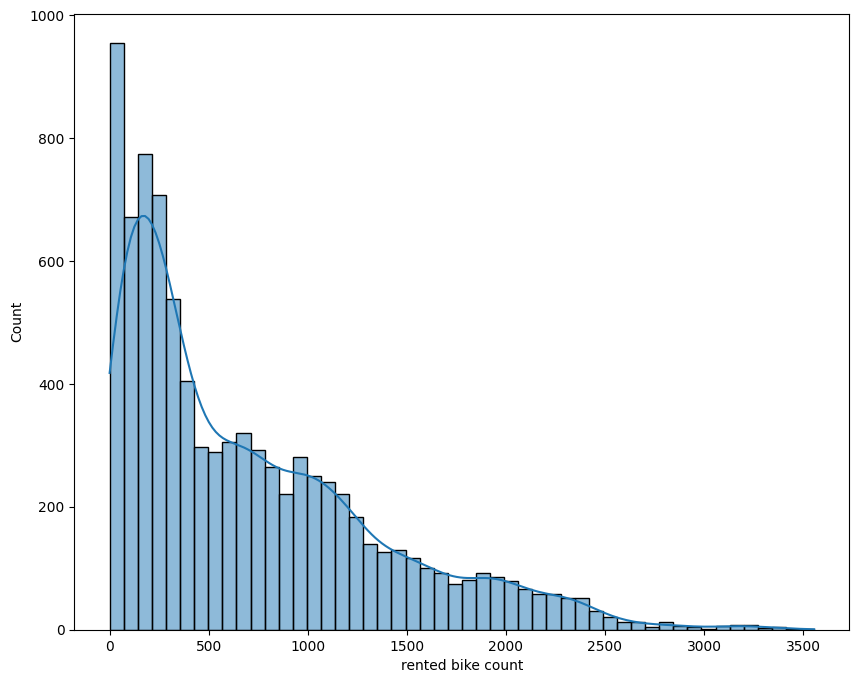

In [141]:
# Plotting histogram plot on rented bike count
plt.figure(figsize = (10,8))
sns.histplot(df['rented bike count'], bins = 50, kde = True)
plt.show()

<Axes: ylabel='rented bike count'>

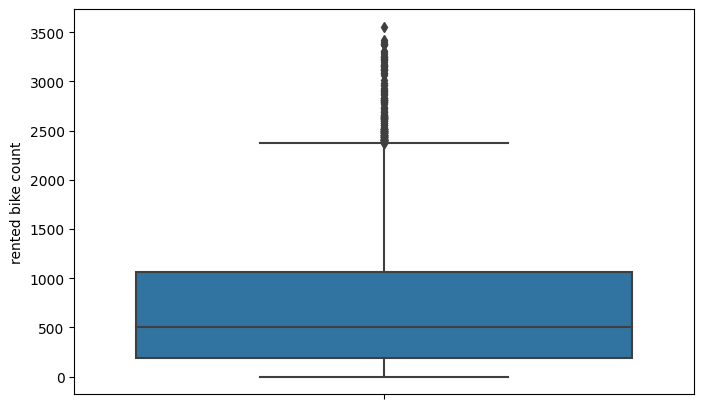

In [142]:
# using boxplot on the dependent variable
plt.figure(figsize = (8,5))
sns.boxplot( y =df['rented bike count'])

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.
Here we use this plot on dependent variable.

A box plot is a standardized way of displaying the distribution of numerical data through quartiles. It provides a visual summary of the data's central tendency, spread, and symmetry, as well as highlighting potential outliers.
Here we used on rented count of bikes variable to know its frequency.

##### 2. What is/are the insight(s) found from the chart?

From the visualization, we can observe that the count of bikes ranges between 0 to 1200. The occurrences of counts greater than 2500 are relatively scarce, and they appear as outliers in the boxplot

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above visualization reveals a positive business impact. A noteworthy aspect is that the count of bikes is significantly higher for values below 500 bikes. To gain further insights, we will conduct additional analysis.

#### Chart - 2 Visualization on Continuous independent variables


In [149]:
# Assigning the categorical and continuous varibles for the easy computational process.
dep_var = 'rented bike count'

cont_var = ['temprature','humidity','wind speed','visibility','dew point temprature','solar radiation','rainfall','snowfall']

cat_var = ['date','hour','seasons','holiday','functioning day','month','day_of_the_month','day_of_week','is_weekend']

print(f'The continuous varibles are {cont_var}')
print(f'The categorical variables are {cat_var}')
print(f'The dependent variable is {dep_var}')

The continuous varibles are ['temprature', 'humidity', 'wind speed', 'visibility', 'dew point temprature', 'solar radiation', 'rainfall', 'snowfall']
The categorical variables are ['date', 'hour', 'seasons', 'holiday', 'functioning day', 'month', 'day_of_the_month', 'day_of_week', 'is_weekend']
The dependent variable is rented bike count


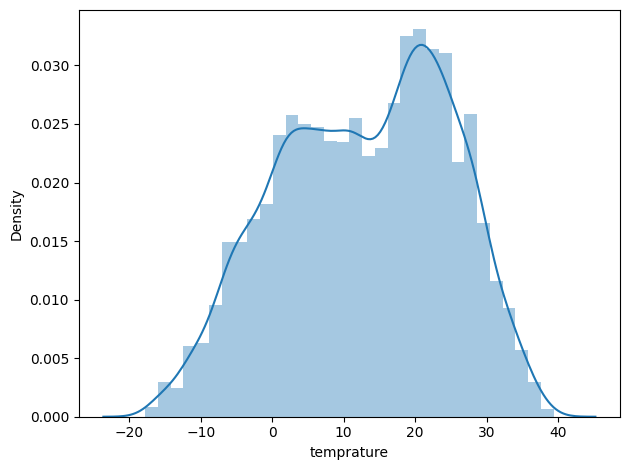

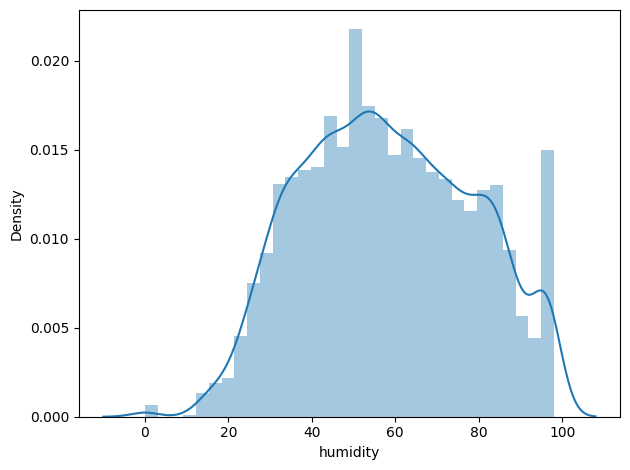

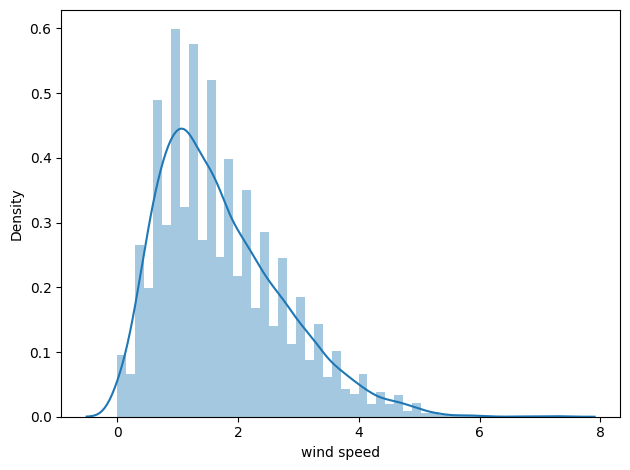

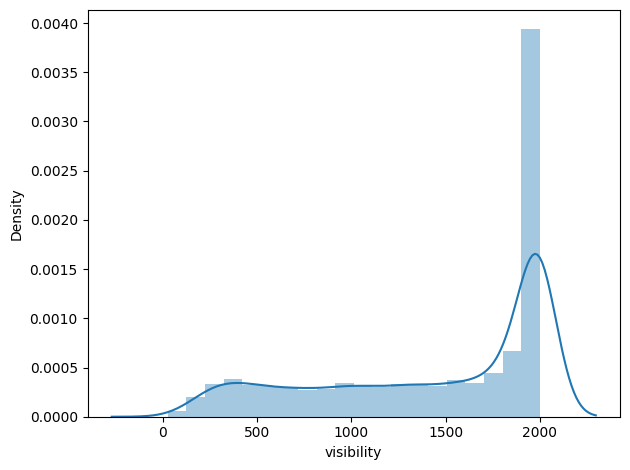

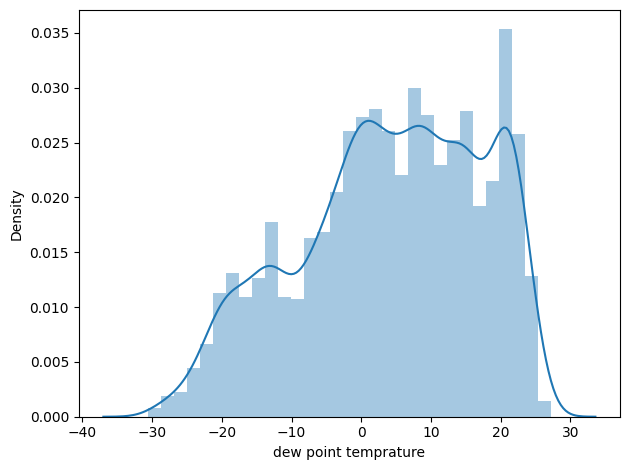

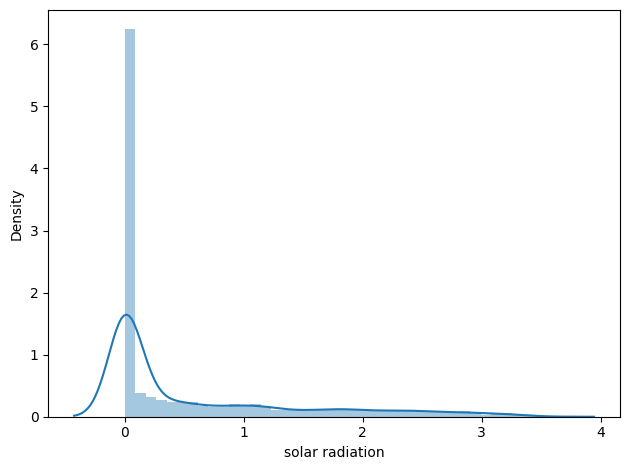

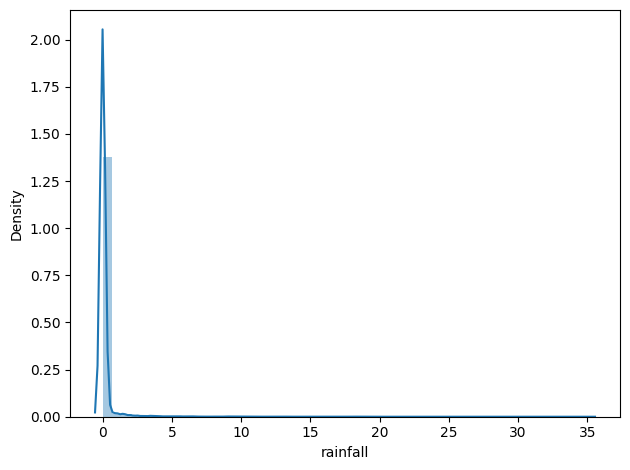

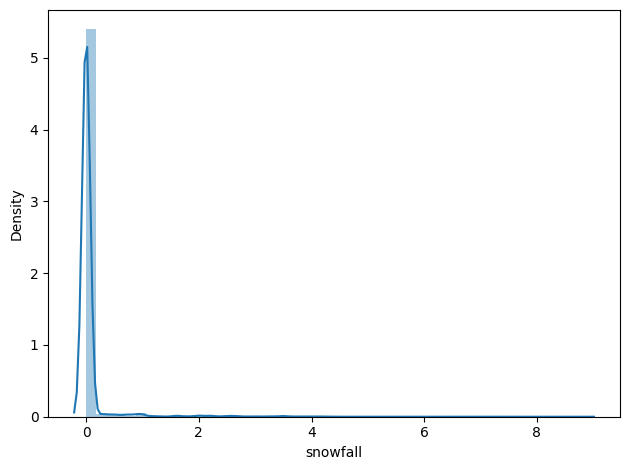

In [150]:
# plotting a distribution graph on continuous independent variable
for col in cont_var :
  sns.distplot(df[col])
  plt.tight_layout()
  plt.show()

##### 1. Why did you pick the specific chart?

A distplot, also known as a histogram-kernel density estimate (KDE) plot. It is useful because it provides a quick and easy way to check the distribution of the data, identify patterns or outliers, and compare the distribution of multiple variables. It also allows to check if the data is following normal distribution or not.

##### 2. What is/are the insight(s) found from the chart?

From the above Univariate analysis, we got to know that temprature and humidity shows normally distributed and remaining shows different distributions.
We can observe outliers in Snowfall, Rainfall,solar radiation, wind speed columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the skewness of variables like rainfall, wind speed, snowfall, and dew point temperature can aid in making informed decisions and improving various aspects of the business.These variables are negatively skewed could mean that extreme weather events (e.g., heavy rainfall, strong winds, or snowstorms) are relatively infrequent, allowing businesses to allocate appropriate resources for maintenance and infrastructure improvement.

#### Chart - 3 Visualization continuous independent variables

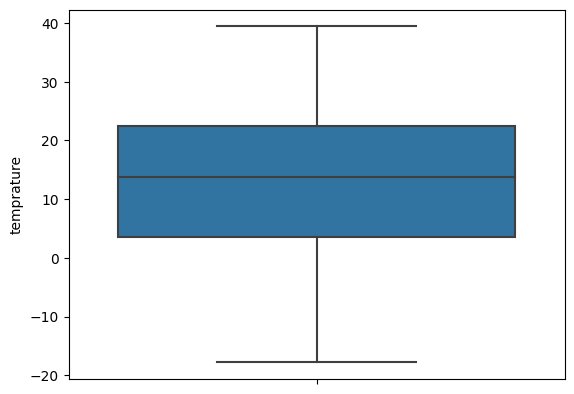

<Figure size 1000x800 with 0 Axes>

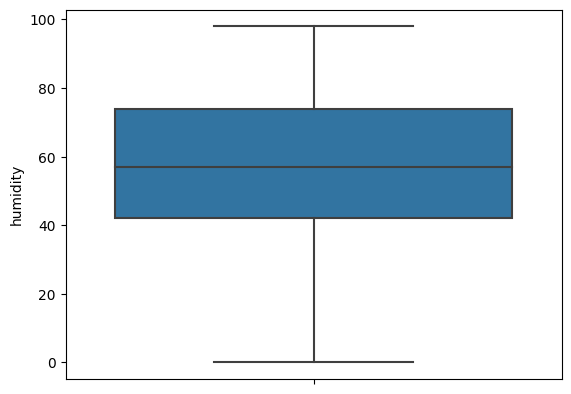

<Figure size 1000x800 with 0 Axes>

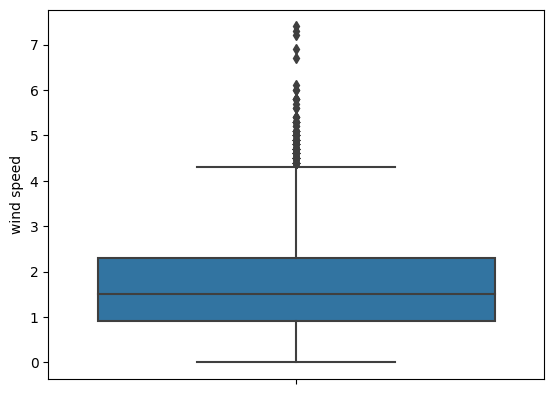

<Figure size 1000x800 with 0 Axes>

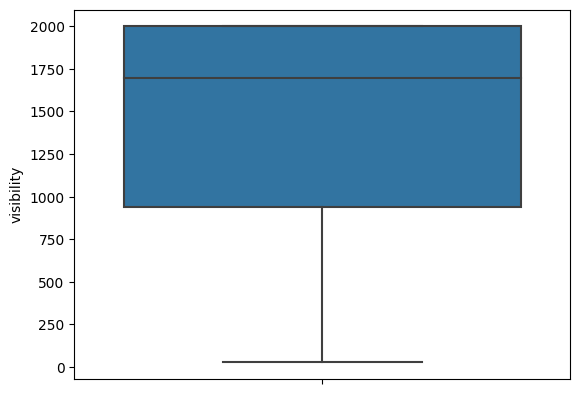

<Figure size 1000x800 with 0 Axes>

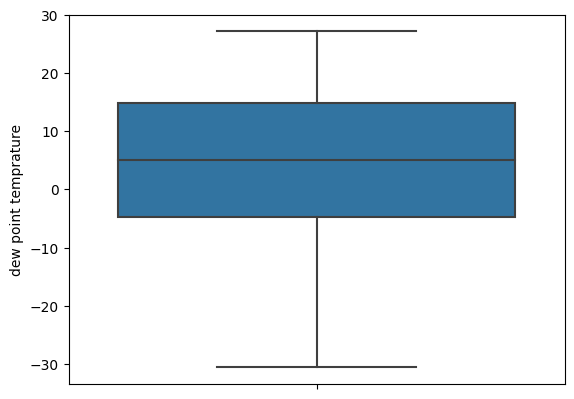

<Figure size 1000x800 with 0 Axes>

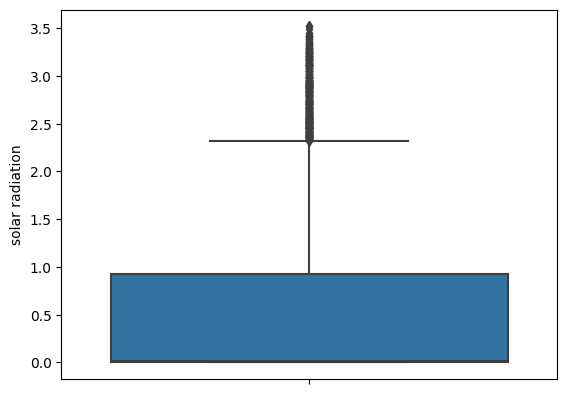

<Figure size 1000x800 with 0 Axes>

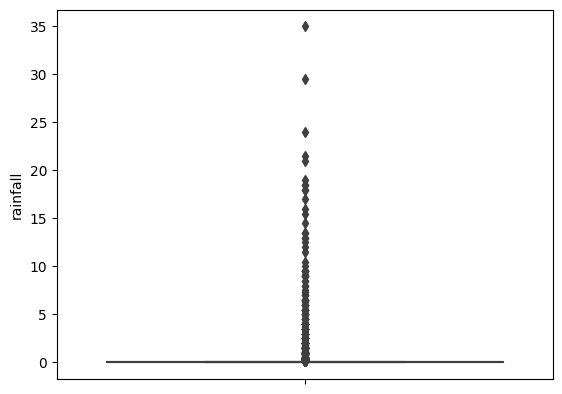

<Figure size 1000x800 with 0 Axes>

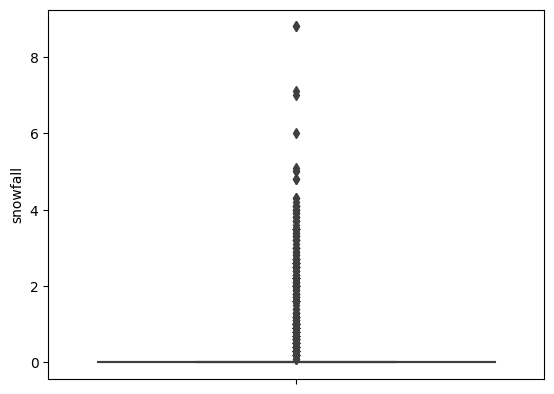

<Figure size 1000x800 with 0 Axes>

In [151]:
# plotting boxplot on numerical variables
for col in cont_var:
  sns.boxplot( y= df[col])
  plt.figure(figsize = (10,8))
  plt.tight_layout()
  plt.show()

##### 1. Why did you pick the specific chart?

A box plot is a standardized way of displaying the distribution of numerical data through quartiles. It provides a visual summary of the data's central tendency, spread, and symmetry, as well as highlighting potential outliers. Here we used on all numerical independent variables to find the spread.

##### 2. What is/are the insight(s) found from the chart?


From the above analysis we got the below insights:

Humidity: The data spread for humidity lies between 40% and 60%, indicating a relatively consistent range of humidity values.

Rainfall: Most of the rainfall data is concentrated at 0, suggesting that a significant portion of the dataset experiences little to no rainfall. Outliers are observed, which might represent extreme rainfall events.

Day_of_the_month: The data spread for the day of the month is observed between 7 and 23, covering a range of days.

Solar radiation: Solar radiation data is primarily distributed between 0 and 1.0, indicating that the dataset mostly contains low solar radiation values.

Wind speed: Wind speed data spread is between 1 and 2, suggesting that wind speeds are relatively moderate.

Month: The data spread for the month ranges from 4 to 10, representing different months in the dataset.

Temperature: The temperature data spread is observed between 2 and 25, covering a range of temperatures.

Hour: Hour data is spread from 6 to 19, representing different hours of the day.

Snowfall: The snowfall data shows outliers, and most of the data is concentrated at 0, indicating infrequent snowfall events.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

On days with rainfall or extreme weather events (outliers), they can offer promotional incentives or alternative transportation options to maintain customer satisfaction.On the tempratures consideration,Businesses can plan for increased bike availability and ensure proper maintenance during peak seasons. Snowfall weather conditions by implementing snow removal plans or temporary suspension of bike services to ensure customer safety and maintain the condition of bikes.

By integrating weather data into their demand forecasting models, businesses can adopt dynamic pricing and marketing strategies.

#### Chart - 4 Visualization on Categorical and dependent variable ( Bivariate analysis)

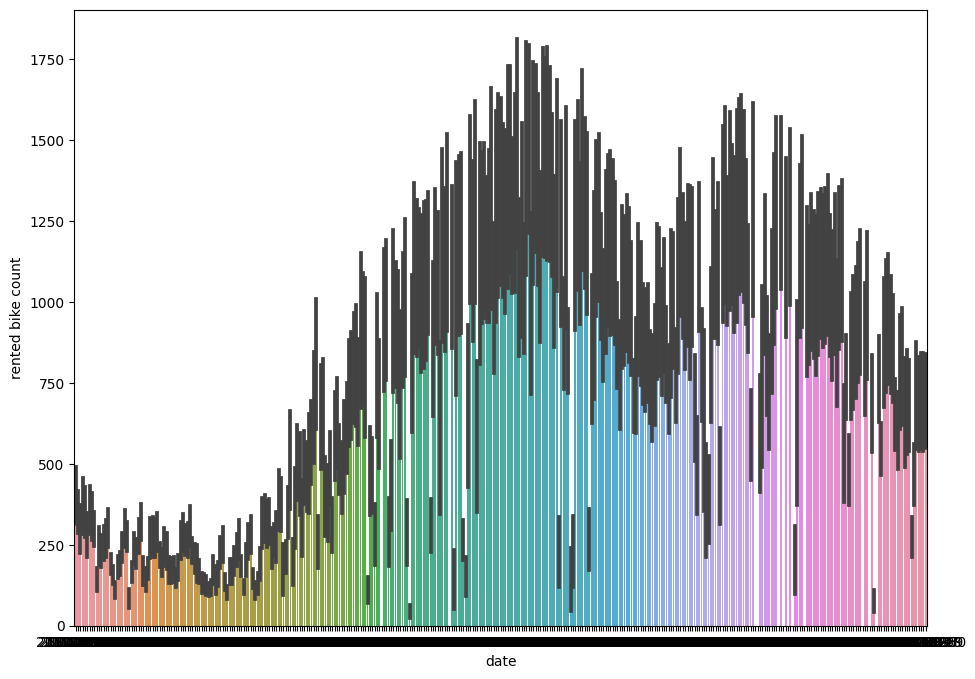

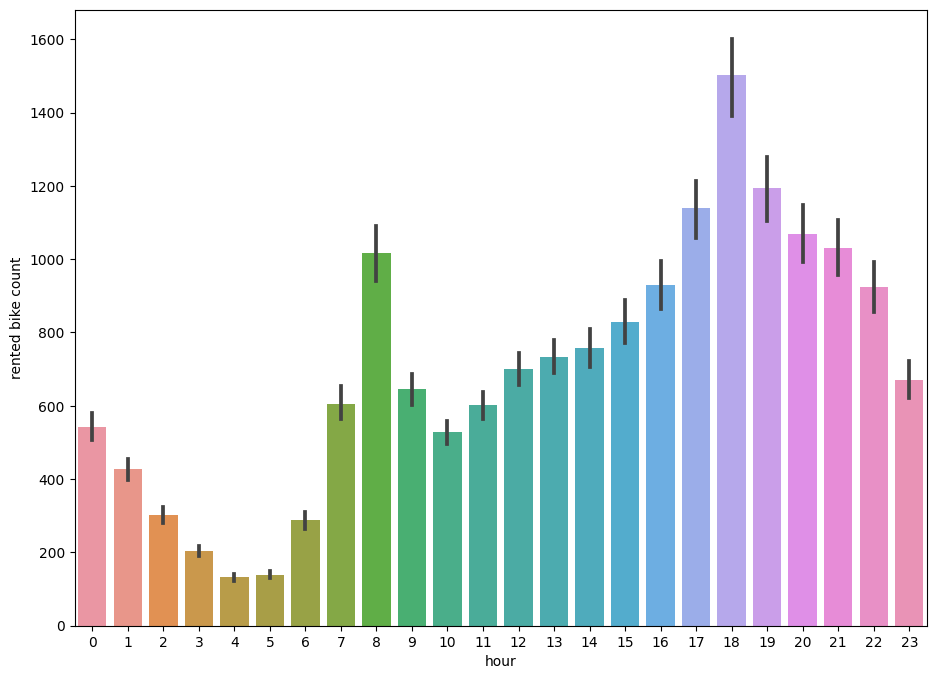

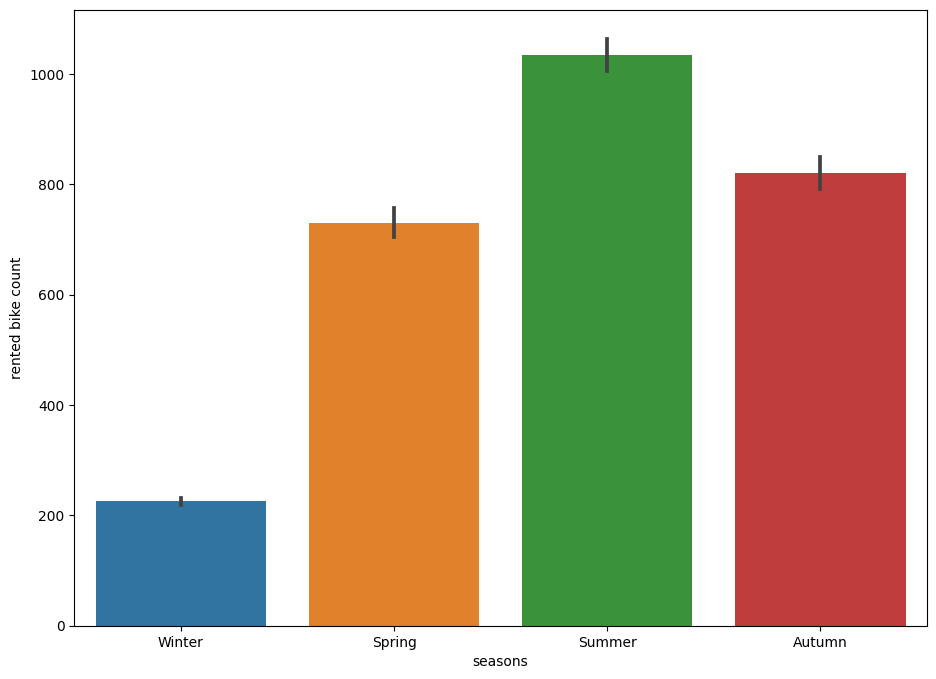

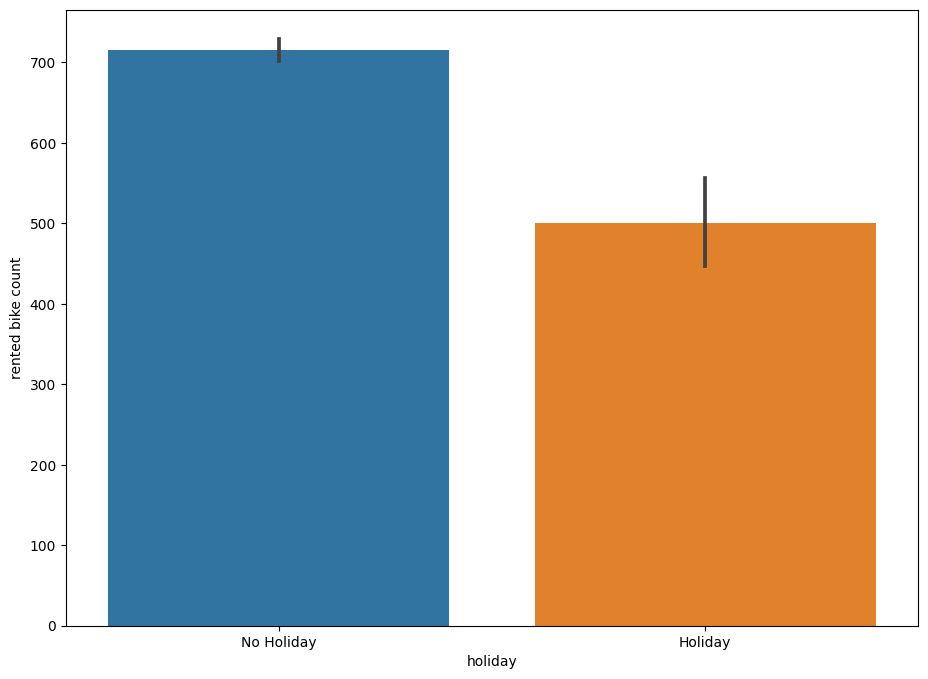

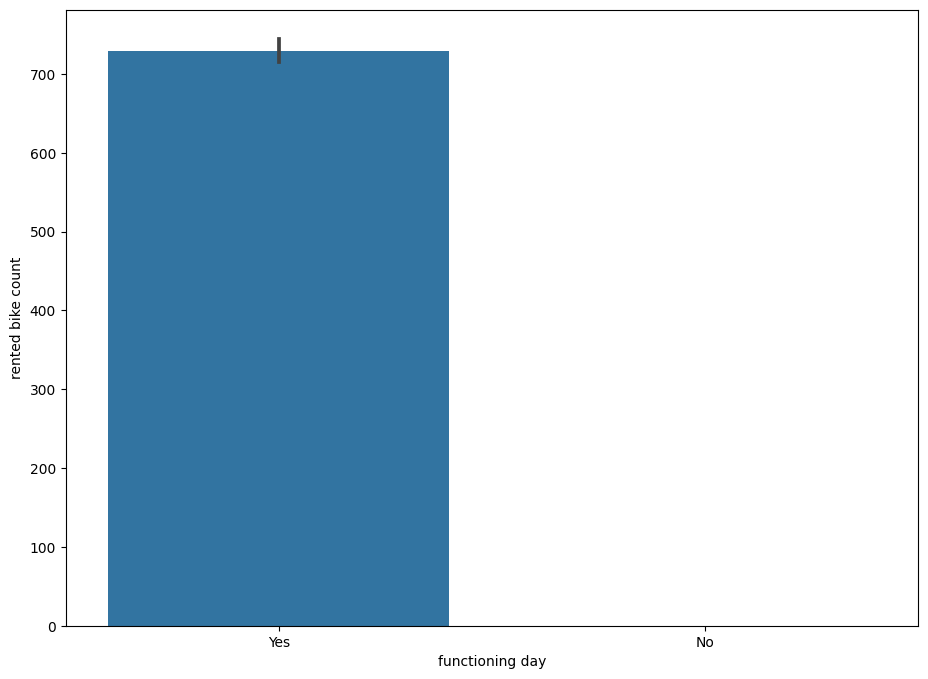

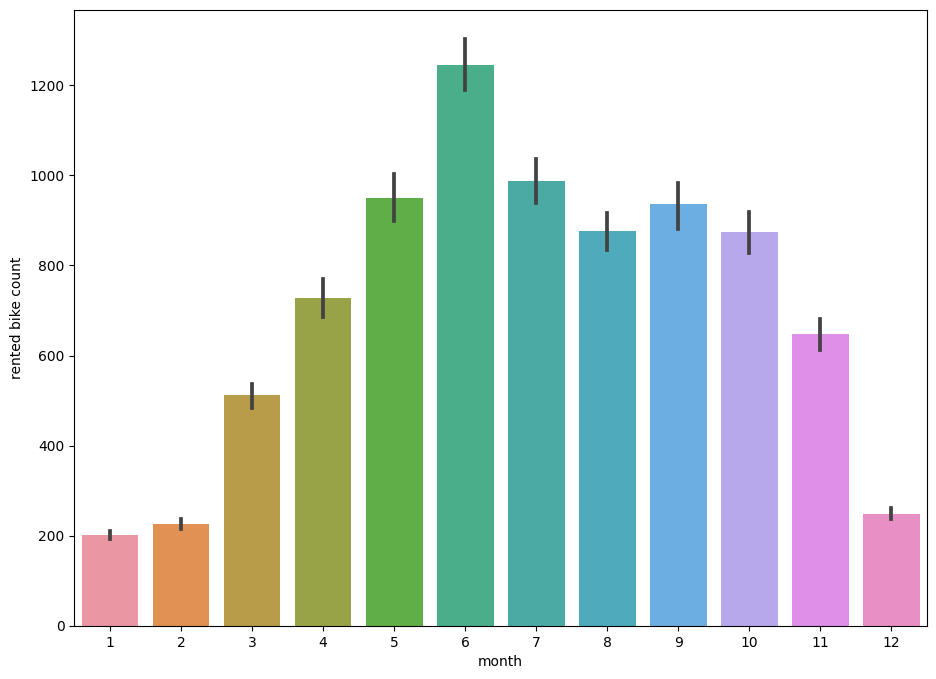

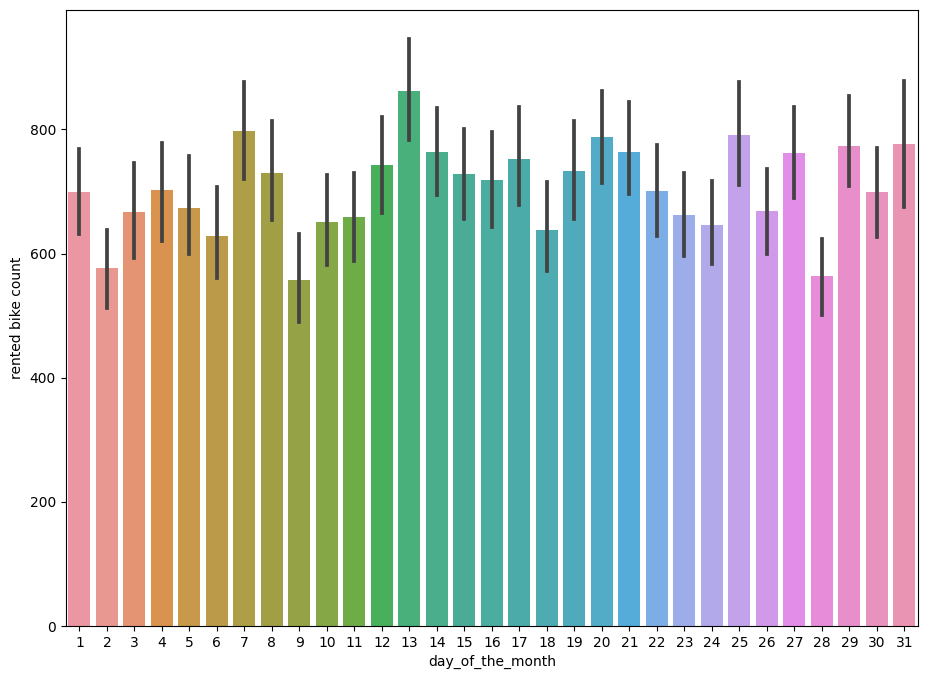

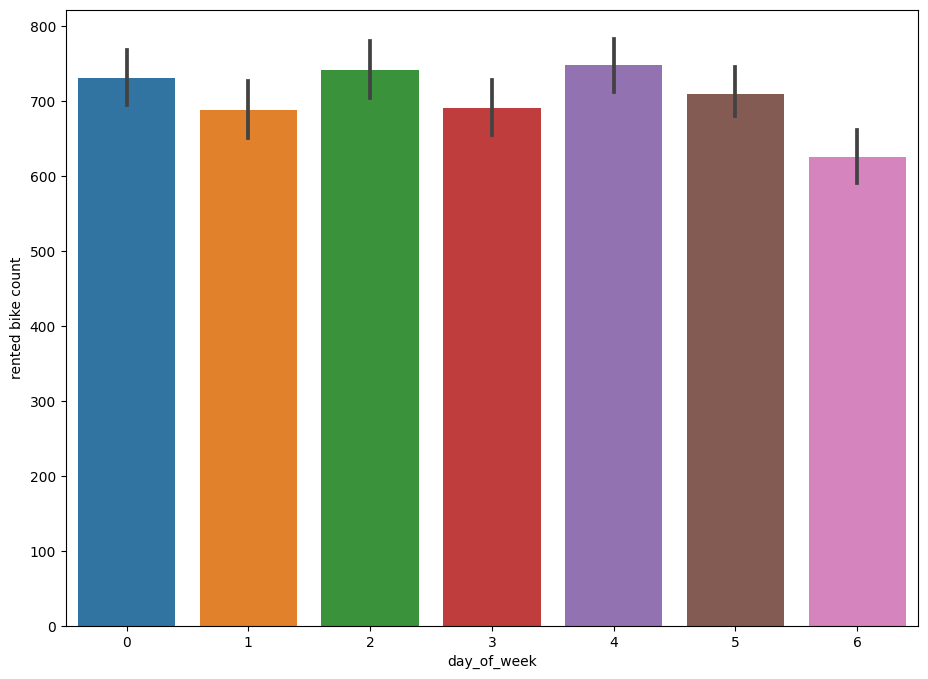

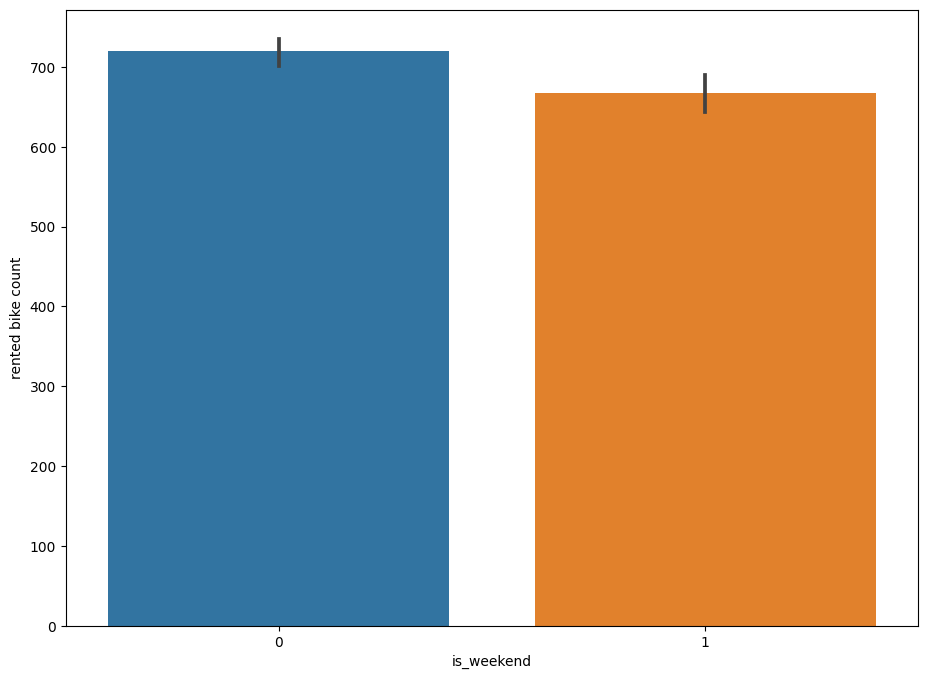

<Figure size 640x480 with 0 Axes>

In [162]:
#Analyzing the relationship between dependent variable and categorical variables
for i, col in enumerate(cat_var):
  plt.figure(figsize = (11,8))
  sns.barplot(x =df[col], y = df['rented bike count'])
  plt.show()
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
Here we used on this plots on catergorical independent variables with dependent variable.

##### 2. What is/are the insight(s) found from the chart?

The above bivariate analysis reveals the following insights:

Regarding the relationship between the hour of the day and the count of rented bikes, it is evident that demand surges from 5pm to 7pm, peaking at 6pm and high trend at 8am in the morning.

The count of bikes is notably higher on functioning days, non-holidays, and weekdays.

It's observed that the demand for bikes is at its peak during the summer month of June and decreases during the winter months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the positive business impact is the company can ensure that they have a sufficient number of bikes available during these high-demand hours and run promotional campaigns to attract riders during these times. This can lead to increased rentals and revenue.

Understanding the peak demand in the summer month of June and lower demand during the winter months informs seasonal inventory management. The company can adjust its bike fleet, marketing campaigns, and pricing strategies to accommodate the seasonally fluctuating demand, which can lead to more efficient operations and revenue optimization.

#### Chart - 5 Visualization on dependent variable and `hour` variable

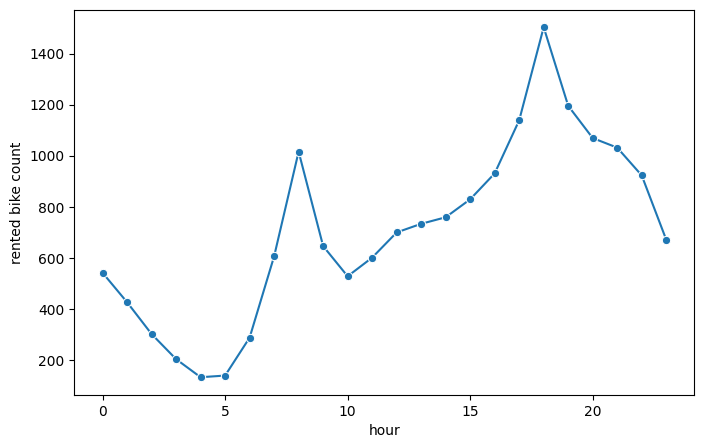

In [163]:
#Plotting graph of Rented bike count on hourly basis using line plot
plt.figure(figsize = (8,5))
avg_hour = df.groupby(df['hour'])['rented bike count'].mean()
sns.lineplot(avg_hour,marker = 'o')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

Here to show the trend of the average value of the count with respective to the hour.

##### 2. What is/are the insight(s) found from the chart?


From the above analysis, the insights are as follows:

- The average bike count is highest at 8 AM in the morning.

- There is a gradual increase in the count from 5 PM to 11 PM, with the peak occurring at 6 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact. Understanding the patterns of bike demand during specific hours can lead to targeted strategies, efficient resource allocation, and improved customer satisfaction.

The insight that the count of bikes is high in the eveing indicates a peak demand hour. This knowledge can be leveraged to ensure sufficient bike availability, maintenance, and customer support during peak hours.

This presents an opportunity for the company to target evening riders and implement strategies to meet this growing demand. It can include promotions for after-work rides, extended service hours, and efficient bike maintenance during this period.

#### Chart - 6 Visualization on all continuous independent variables with date, month, day variables.( Bivariate Analysis)

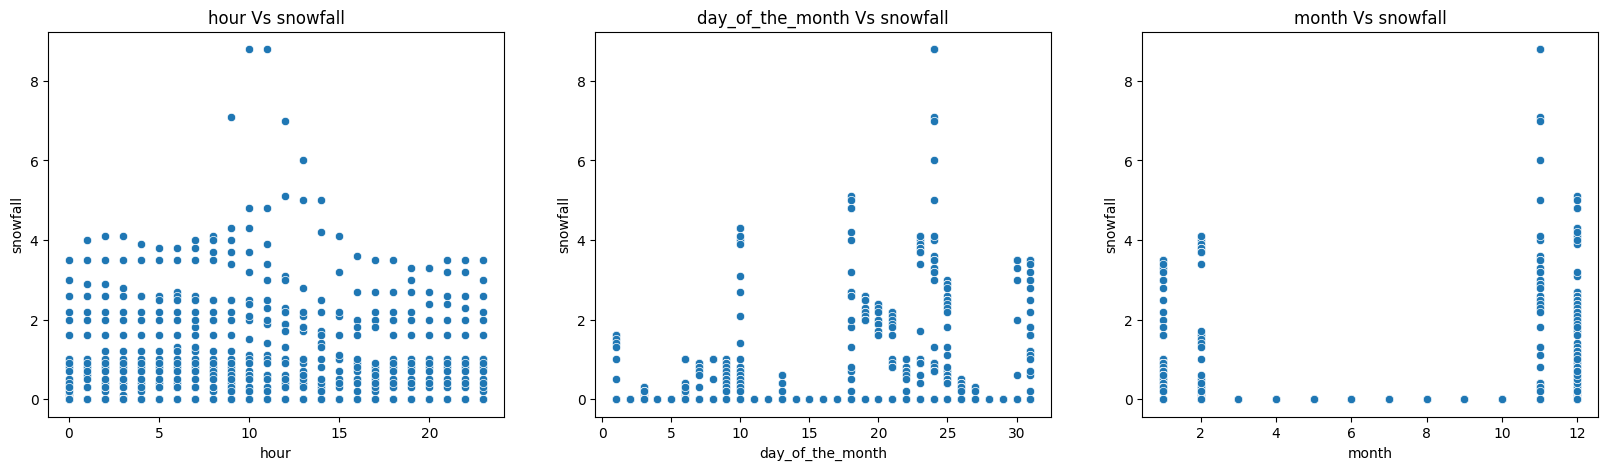

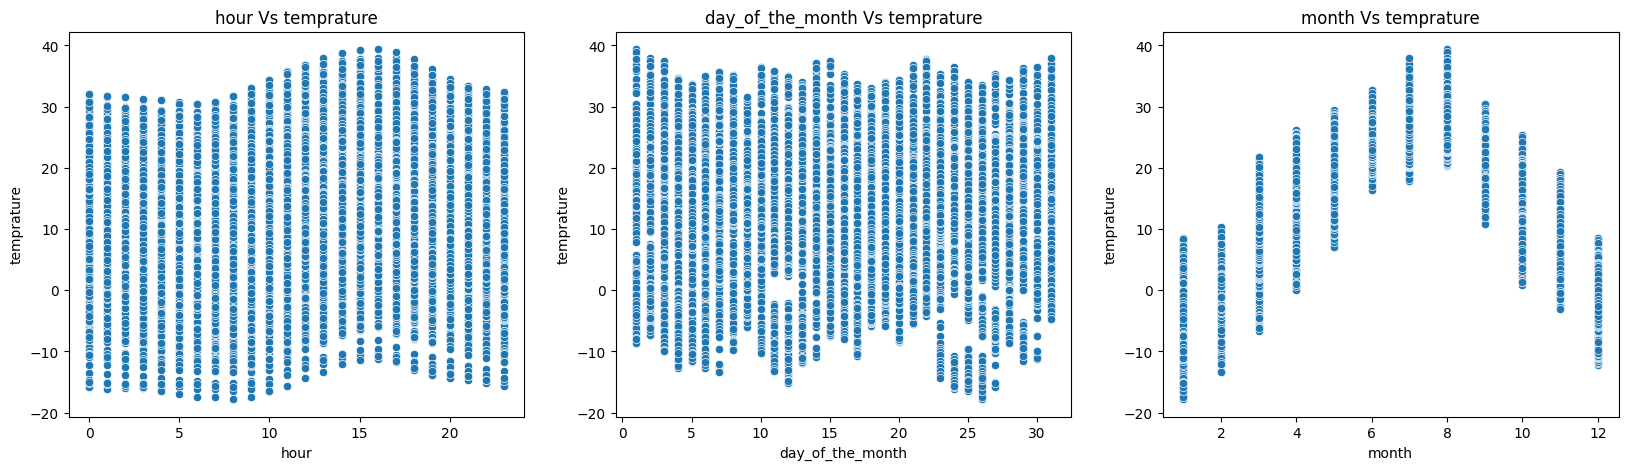

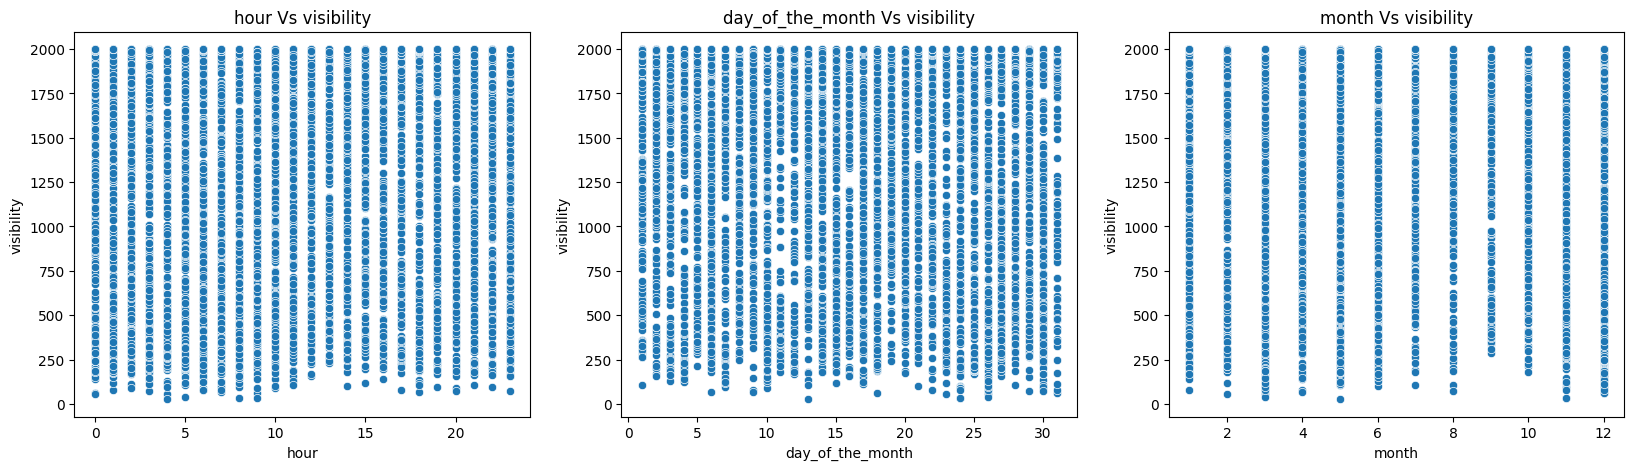

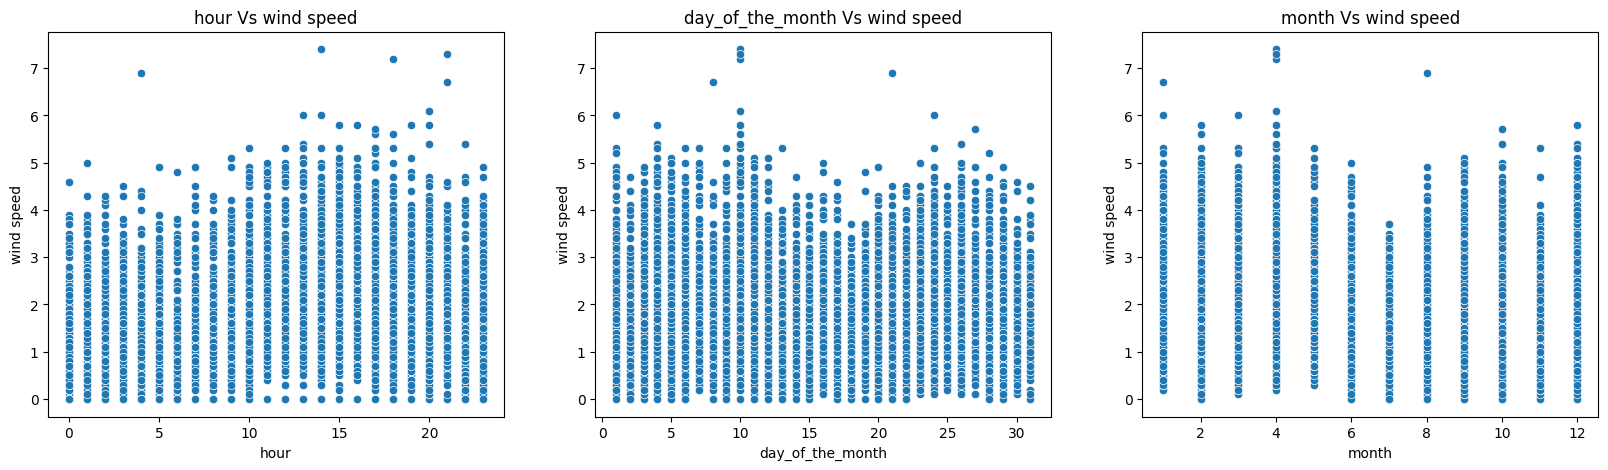

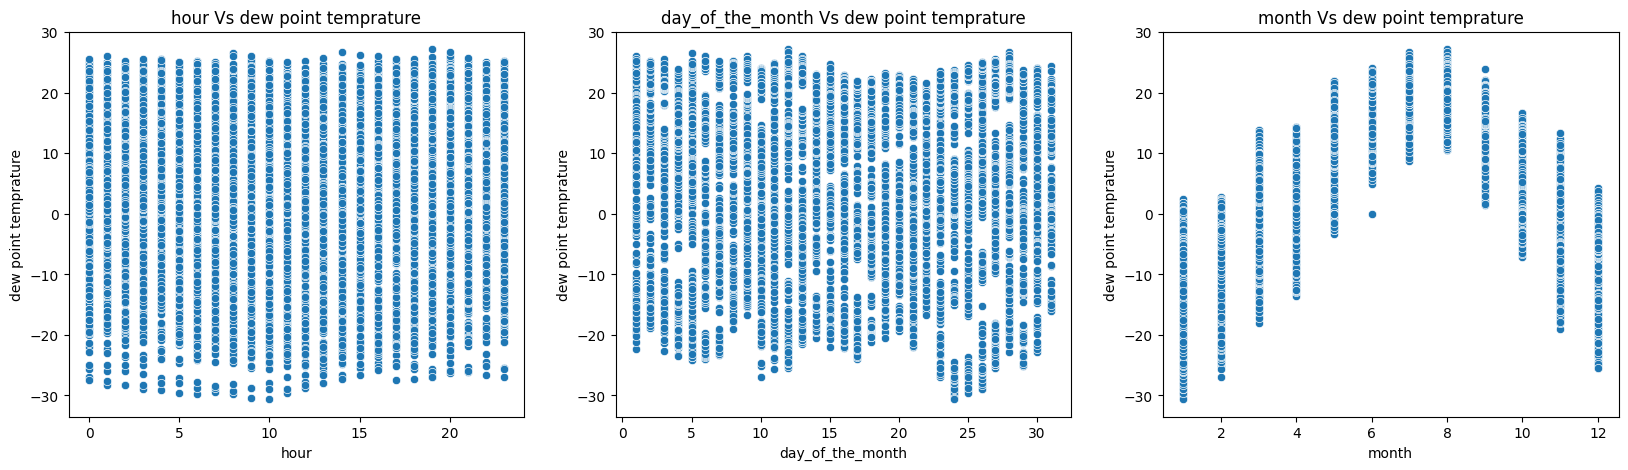

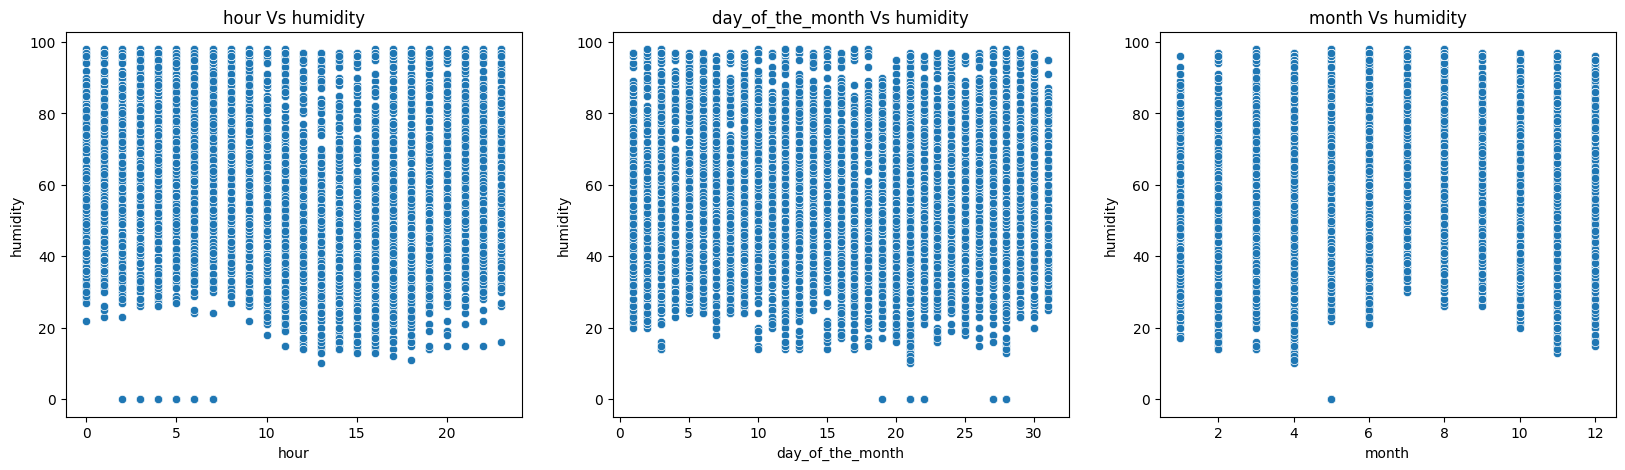

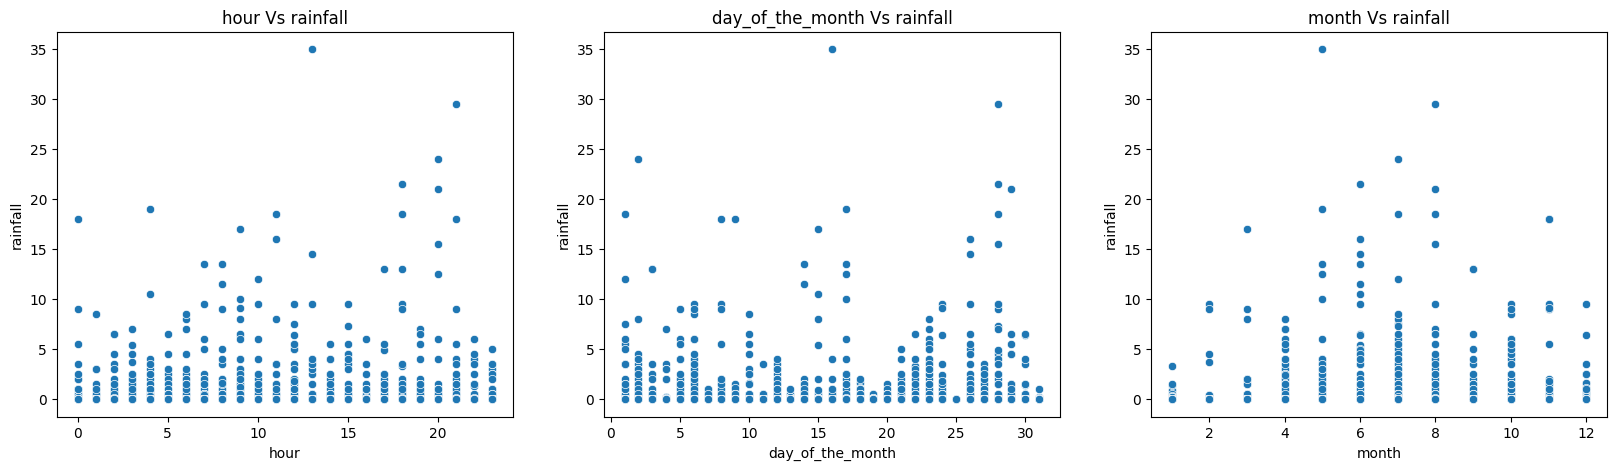

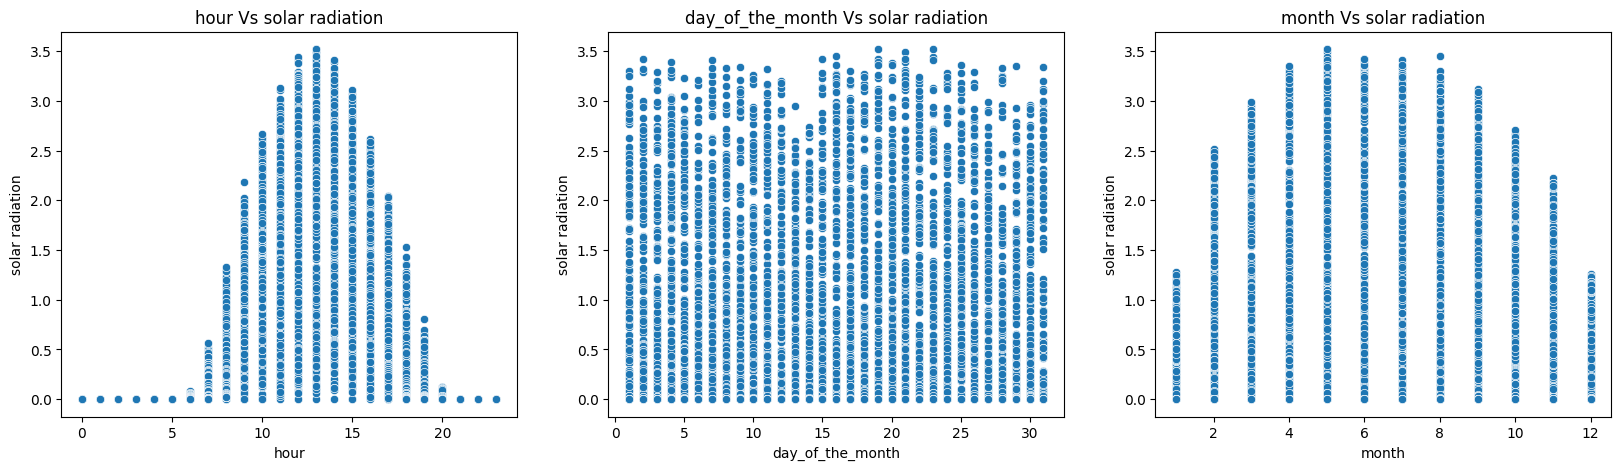

In [166]:
# Plotting a scatter plot of all the numerical independent variables with respect to the hour,month and daily basis.

for col in ['snowfall','temprature','visibility','wind speed','dew point temprature','humidity','rainfall','solar radiation']:
  fig, ax = plt.subplots(1,3, figsize = (20,5))
  for index,col1 in enumerate(['hour','day_of_the_month','month']):
    sns.scatterplot(x = df[col1], y = df[col], ax = ax[index])
    ax[index].set_title(f'{col1} Vs {col}')
  plt.show()
  print('\n\n\n')


##### 1. Why did you pick the specific chart?

Scatterplots are a type of data visualization used to represent the relationship between two continuous variables. They display individual data points as points on a Cartesian plane, with one variable represented on the x-axis and the other variable on the y-axis.Here we used on all numerical independent variables.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the analysis are:

- Snowfall is higher during the months from 11 to 2 (November to February).

- Rainfall is higher during the months from 4 to 10 (April to October).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Snowfall** : Knowing that snowfall is higher during the months from November to February allows businesses to plan their operations accordingly.

**Rainfall** : Understanding that rainfall is higher during the months from April to October allows businesses to prepare for increased bike demand during the dry periods. During rainy months, businesses can focus on maintenance and promotion of other services. Additionally, they can implement rainproof solutions or offer discounts on rainy days to encourage bike usage even during light showers.

#### Chart - 7 Visualization on dependent variable with continuous varibles (Bivariate analysis)

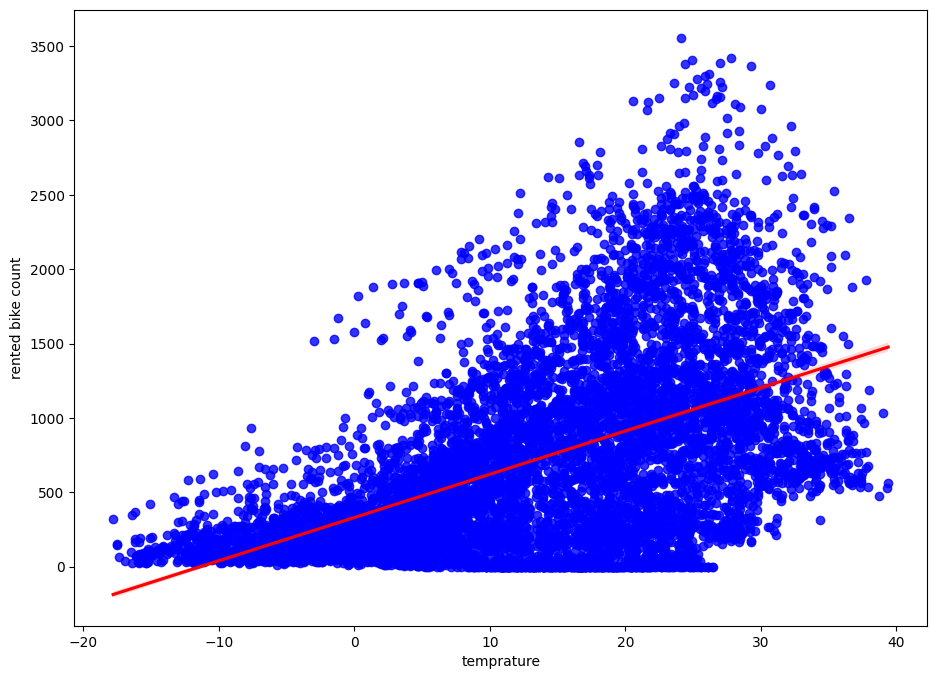

<Figure size 640x480 with 0 Axes>

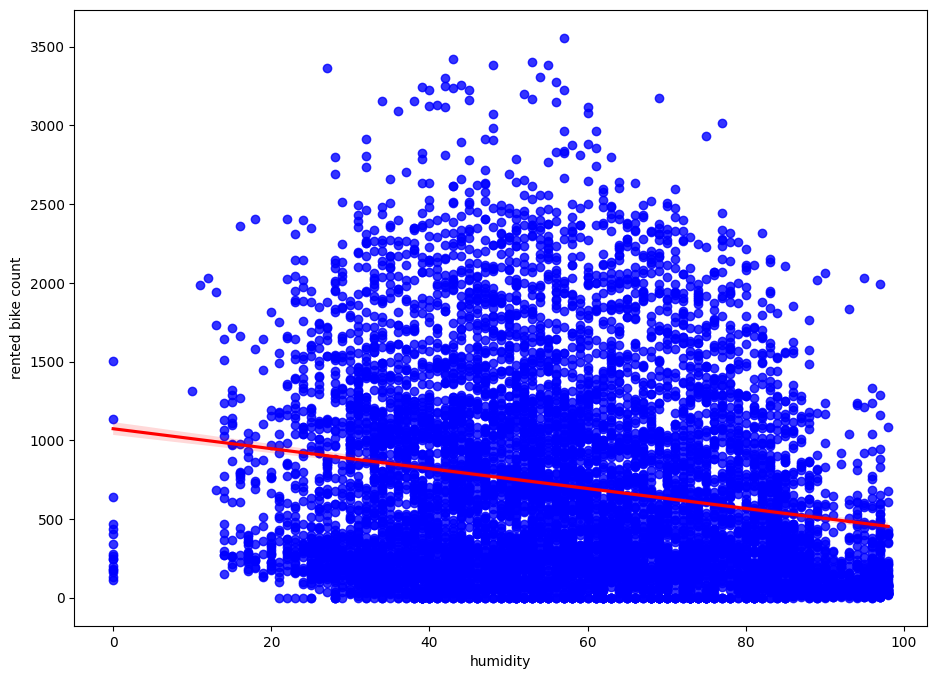

<Figure size 640x480 with 0 Axes>

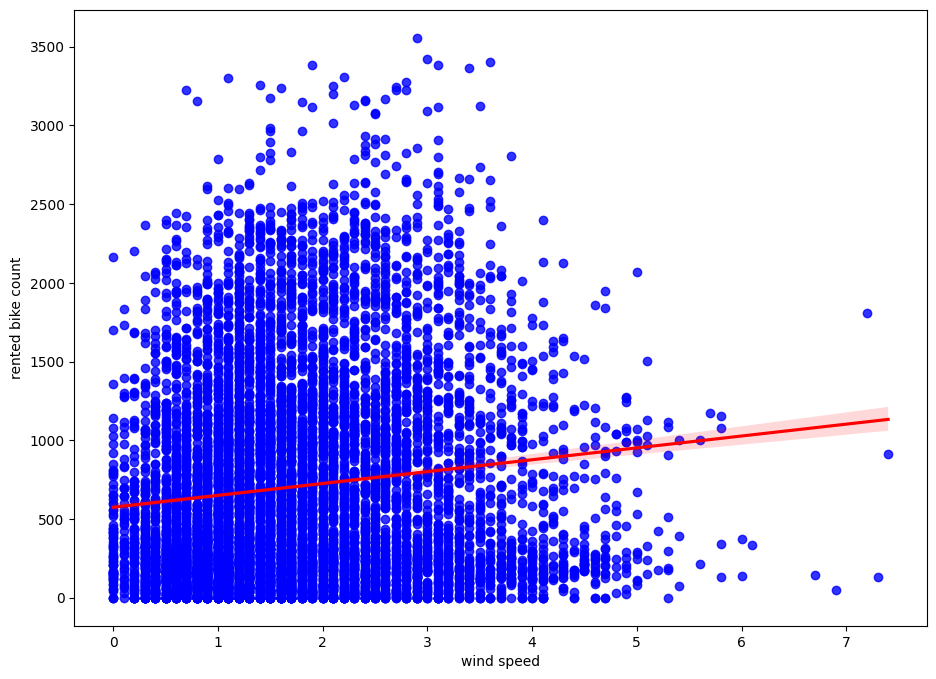

<Figure size 640x480 with 0 Axes>

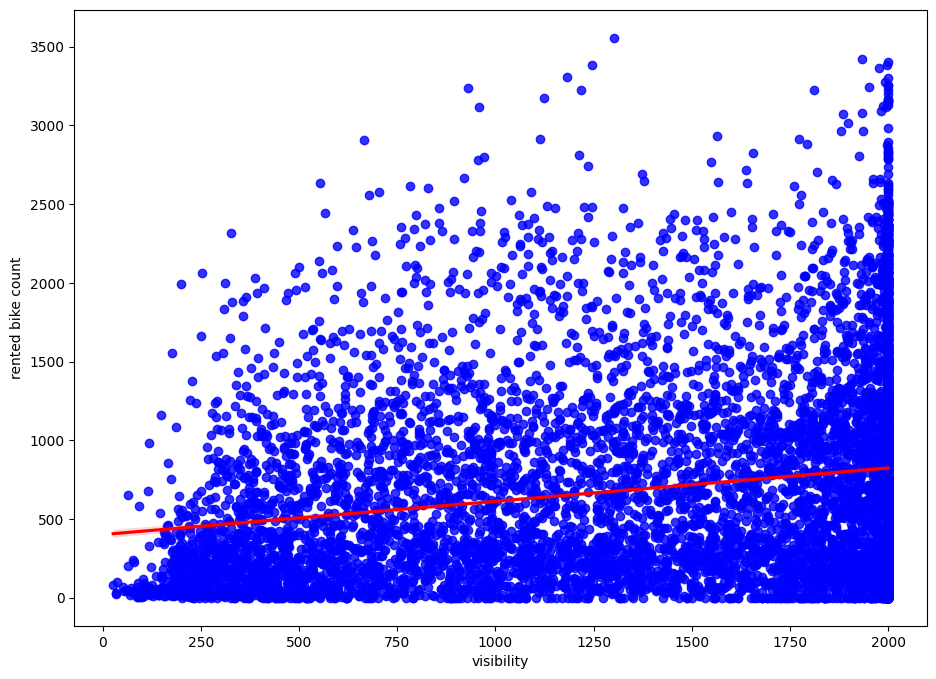

<Figure size 640x480 with 0 Axes>

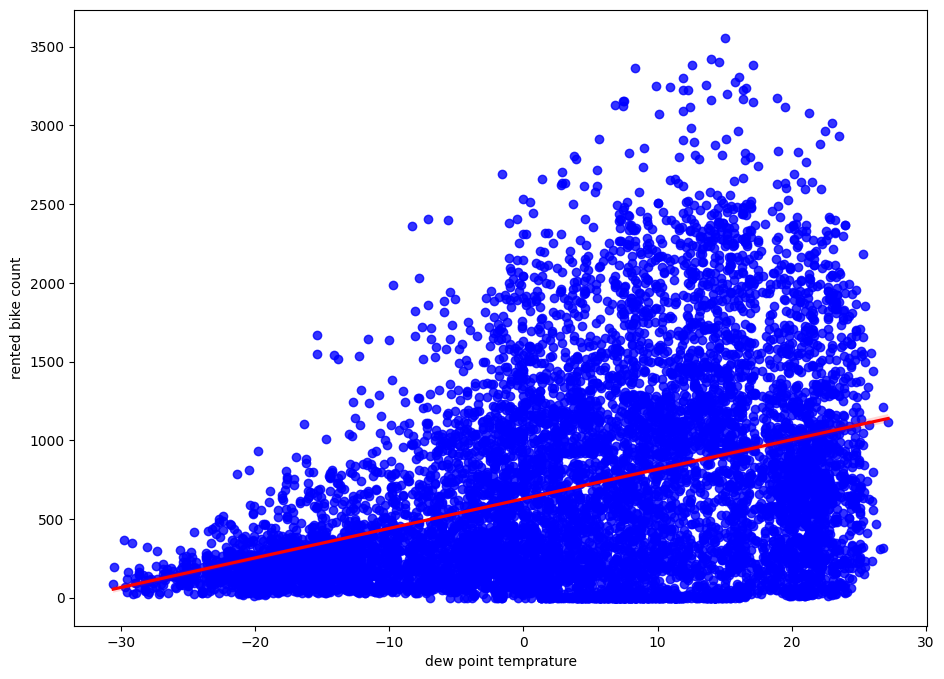

<Figure size 640x480 with 0 Axes>

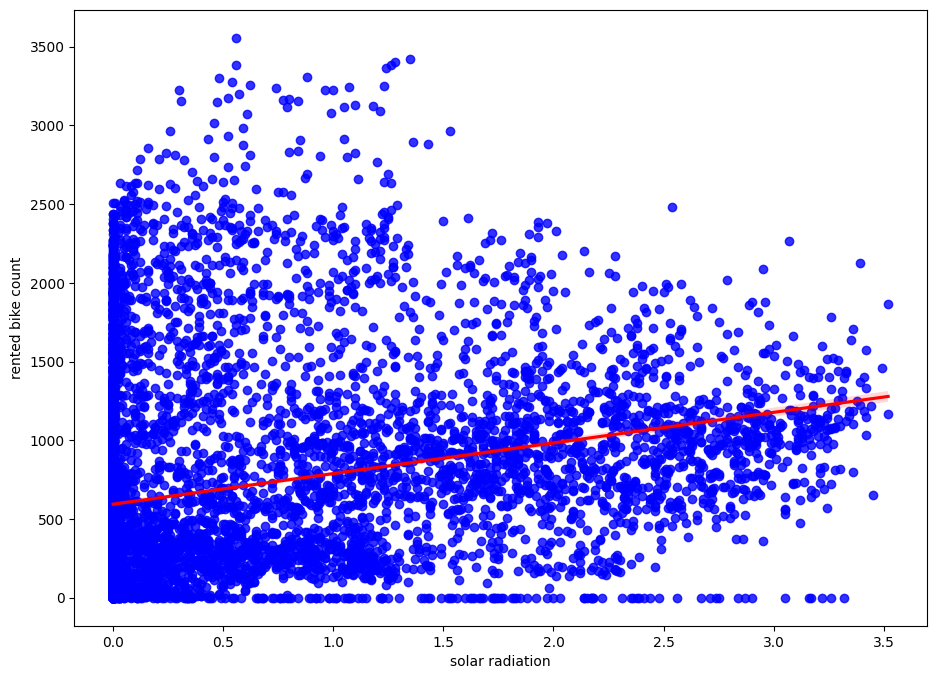

<Figure size 640x480 with 0 Axes>

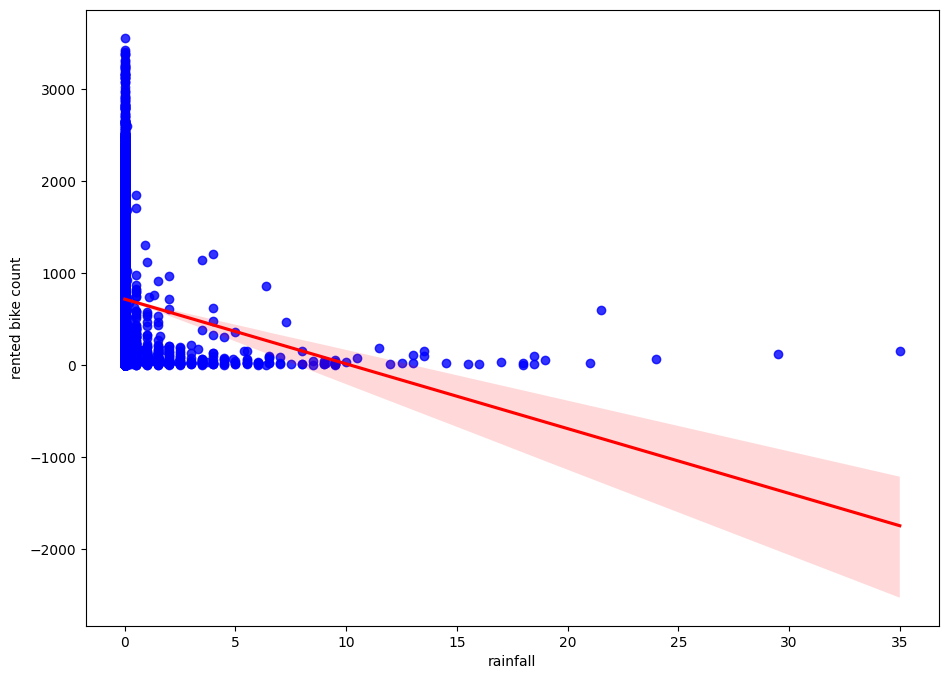

<Figure size 640x480 with 0 Axes>

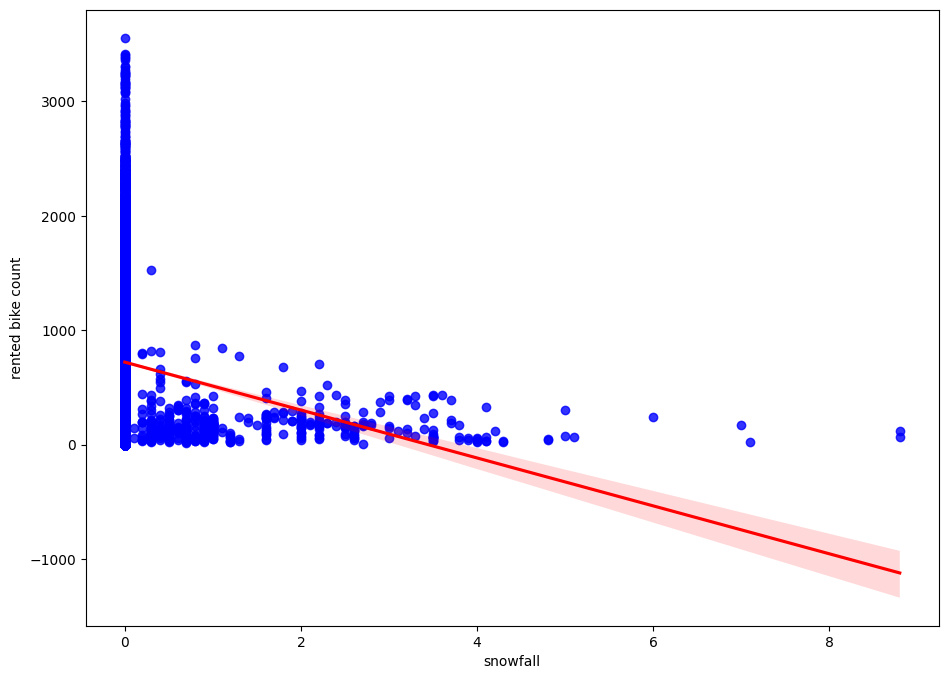

<Figure size 640x480 with 0 Axes>

In [167]:
# Analysing the linear relationship between continous variable and dependent variable
for i in cont_var:
  plt.figure(figsize =(11,8))
  sns.regplot(x = df[i], y = df['rented bike count'],scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
  plt.show()
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A regplot is a Seaborn function that creates a scatter plot with a linear regression line. It's used to visualize and estimate the linear relationship between two variables, making it a useful tool for assessing correlations and trends in data. regplot combines a scatterplot of data points with a regression line, providing insights into the strength and direction of the relationship.

Here we used this to find the patterns between dependent variables and the continuous variables.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained are as follows:
- There is some linear relationship between solar radiation , dew point temprature and temprature with dependent variable.

- Remaining other variables are not showing any patterns.

###### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The identification of linear relationships between solar radiation, dew point temperature, and temperature with the dependent variable can be highly beneficial. It suggests that these variables have a significant impact on bike demand. To create a positive impact, the business can focus on optimizing its strategies related to these variables. For instance, it can offer promotions or services that align with weather conditions and solar radiation levels to attract more customers.

#### Chart - 8 Visualization on contribution of categorical variable `season` with dependent variable

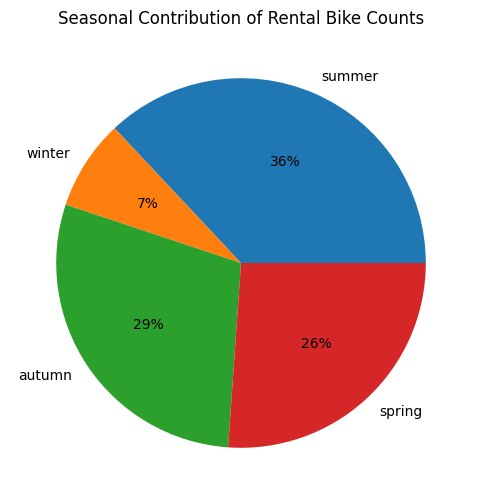

In [168]:
# extracting the values of the seasons
summer = df[df['seasons'] == 'Summer'].sum()
winter = df[df['seasons'] == 'Winter'].sum()
autumn = df[df['seasons'] == 'Autumn'].sum()
spring = df[df['seasons'] == 'Spring'].sum()
# plotting pie chart
bike_seasons = {'summer': summer['rented bike count'], 'winter' : winter['rented bike count'], 'autumn': autumn['rented bike count'], 'spring': spring['rented bike count']}
plt.gcf().set_size_inches(6,6)
plt.pie(bike_seasons.values(),labels = bike_seasons.keys(), autopct = '%1d%%')
plt.title('Seasonal Contribution of Rental Bike Counts', fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

So, we used pie chart to see percentage distribution of rented bike on the basis of seasons

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, the following insights can be summarized:

Year-wise, the highest number of counts occurs in summer, accounting for 36% of the total counts, followed by autumn with approximately 29%. Conversely, the lowest counts are observed in winter, representing only 7% of the total.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business needs to consider how to manage lower demand efficiently. If not handled properly, it could result in underutilized resources and decreased revenue. Strategies such as offering off-season services or storage might be necessary to mitigate this.

#### Chart - 9 Correlation Heat map

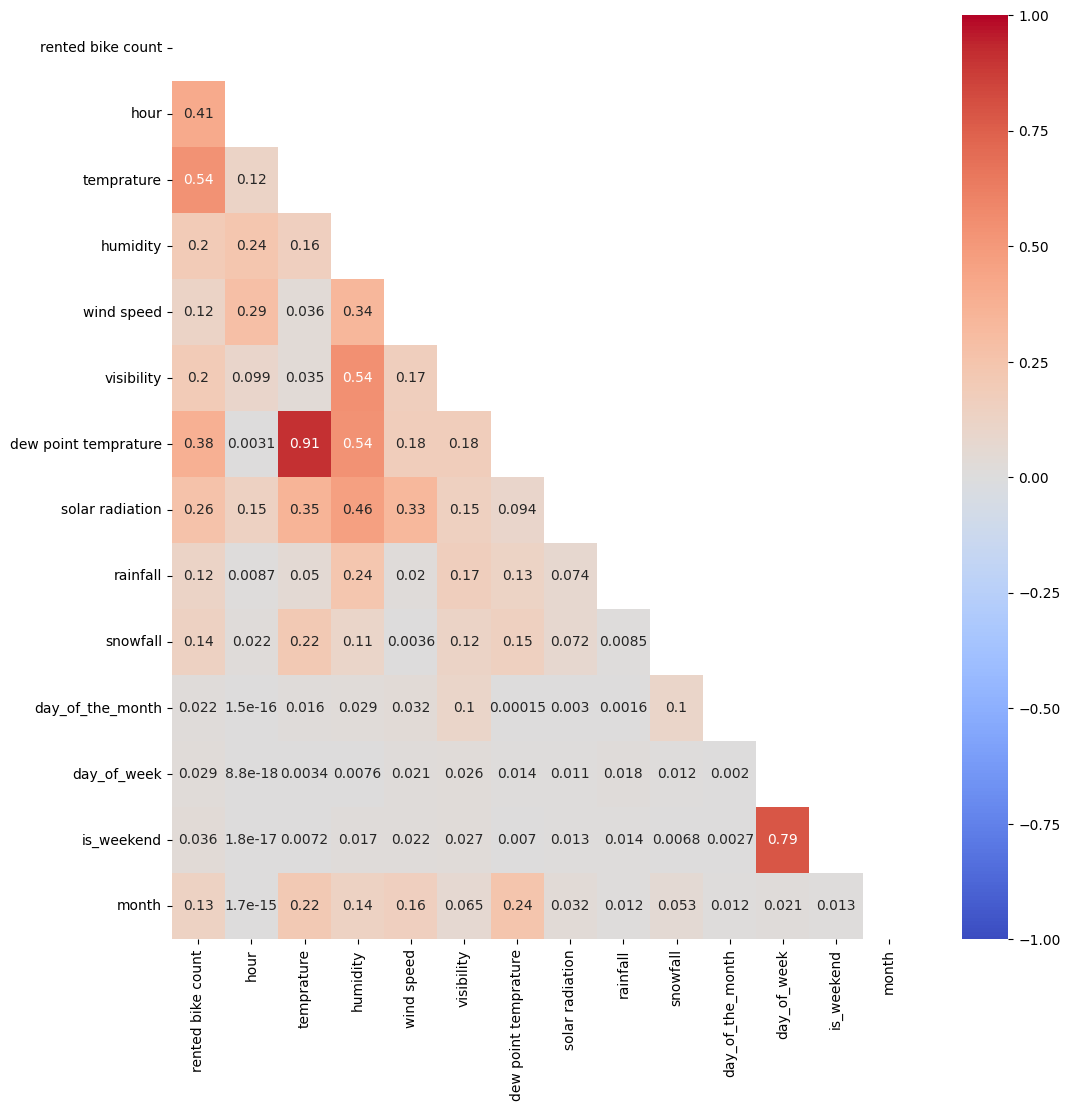

In [169]:
# Visualtization of Correlation Heat Map
corr = df.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize =(12,12))
sns.heatmap(np.abs(corr),mask = mask ,annot = True,vmin = -1, vmax = 1 , cmap = 'coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].
- If the value is towards 1, then there is a positive correlation which means if one variable value increases then the other value also increases.
- If the value is towards -1 then there is negative correlation which means if one value increase then the other value decreases.

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, the insights can be summarized as follows:
- Temperature and hour exhibit a slight positive correlation with the count of rented bikes.
- Dew point temperature is slightly positively correlated with both temperature and humidity.
- Visibility demonstrates a slight positive correlation with humidity.
- The variables "day of the week" and "is_weekend" exhibit a slight positive correlation.

Answer Here

#### Chart - 10 Pair Plot

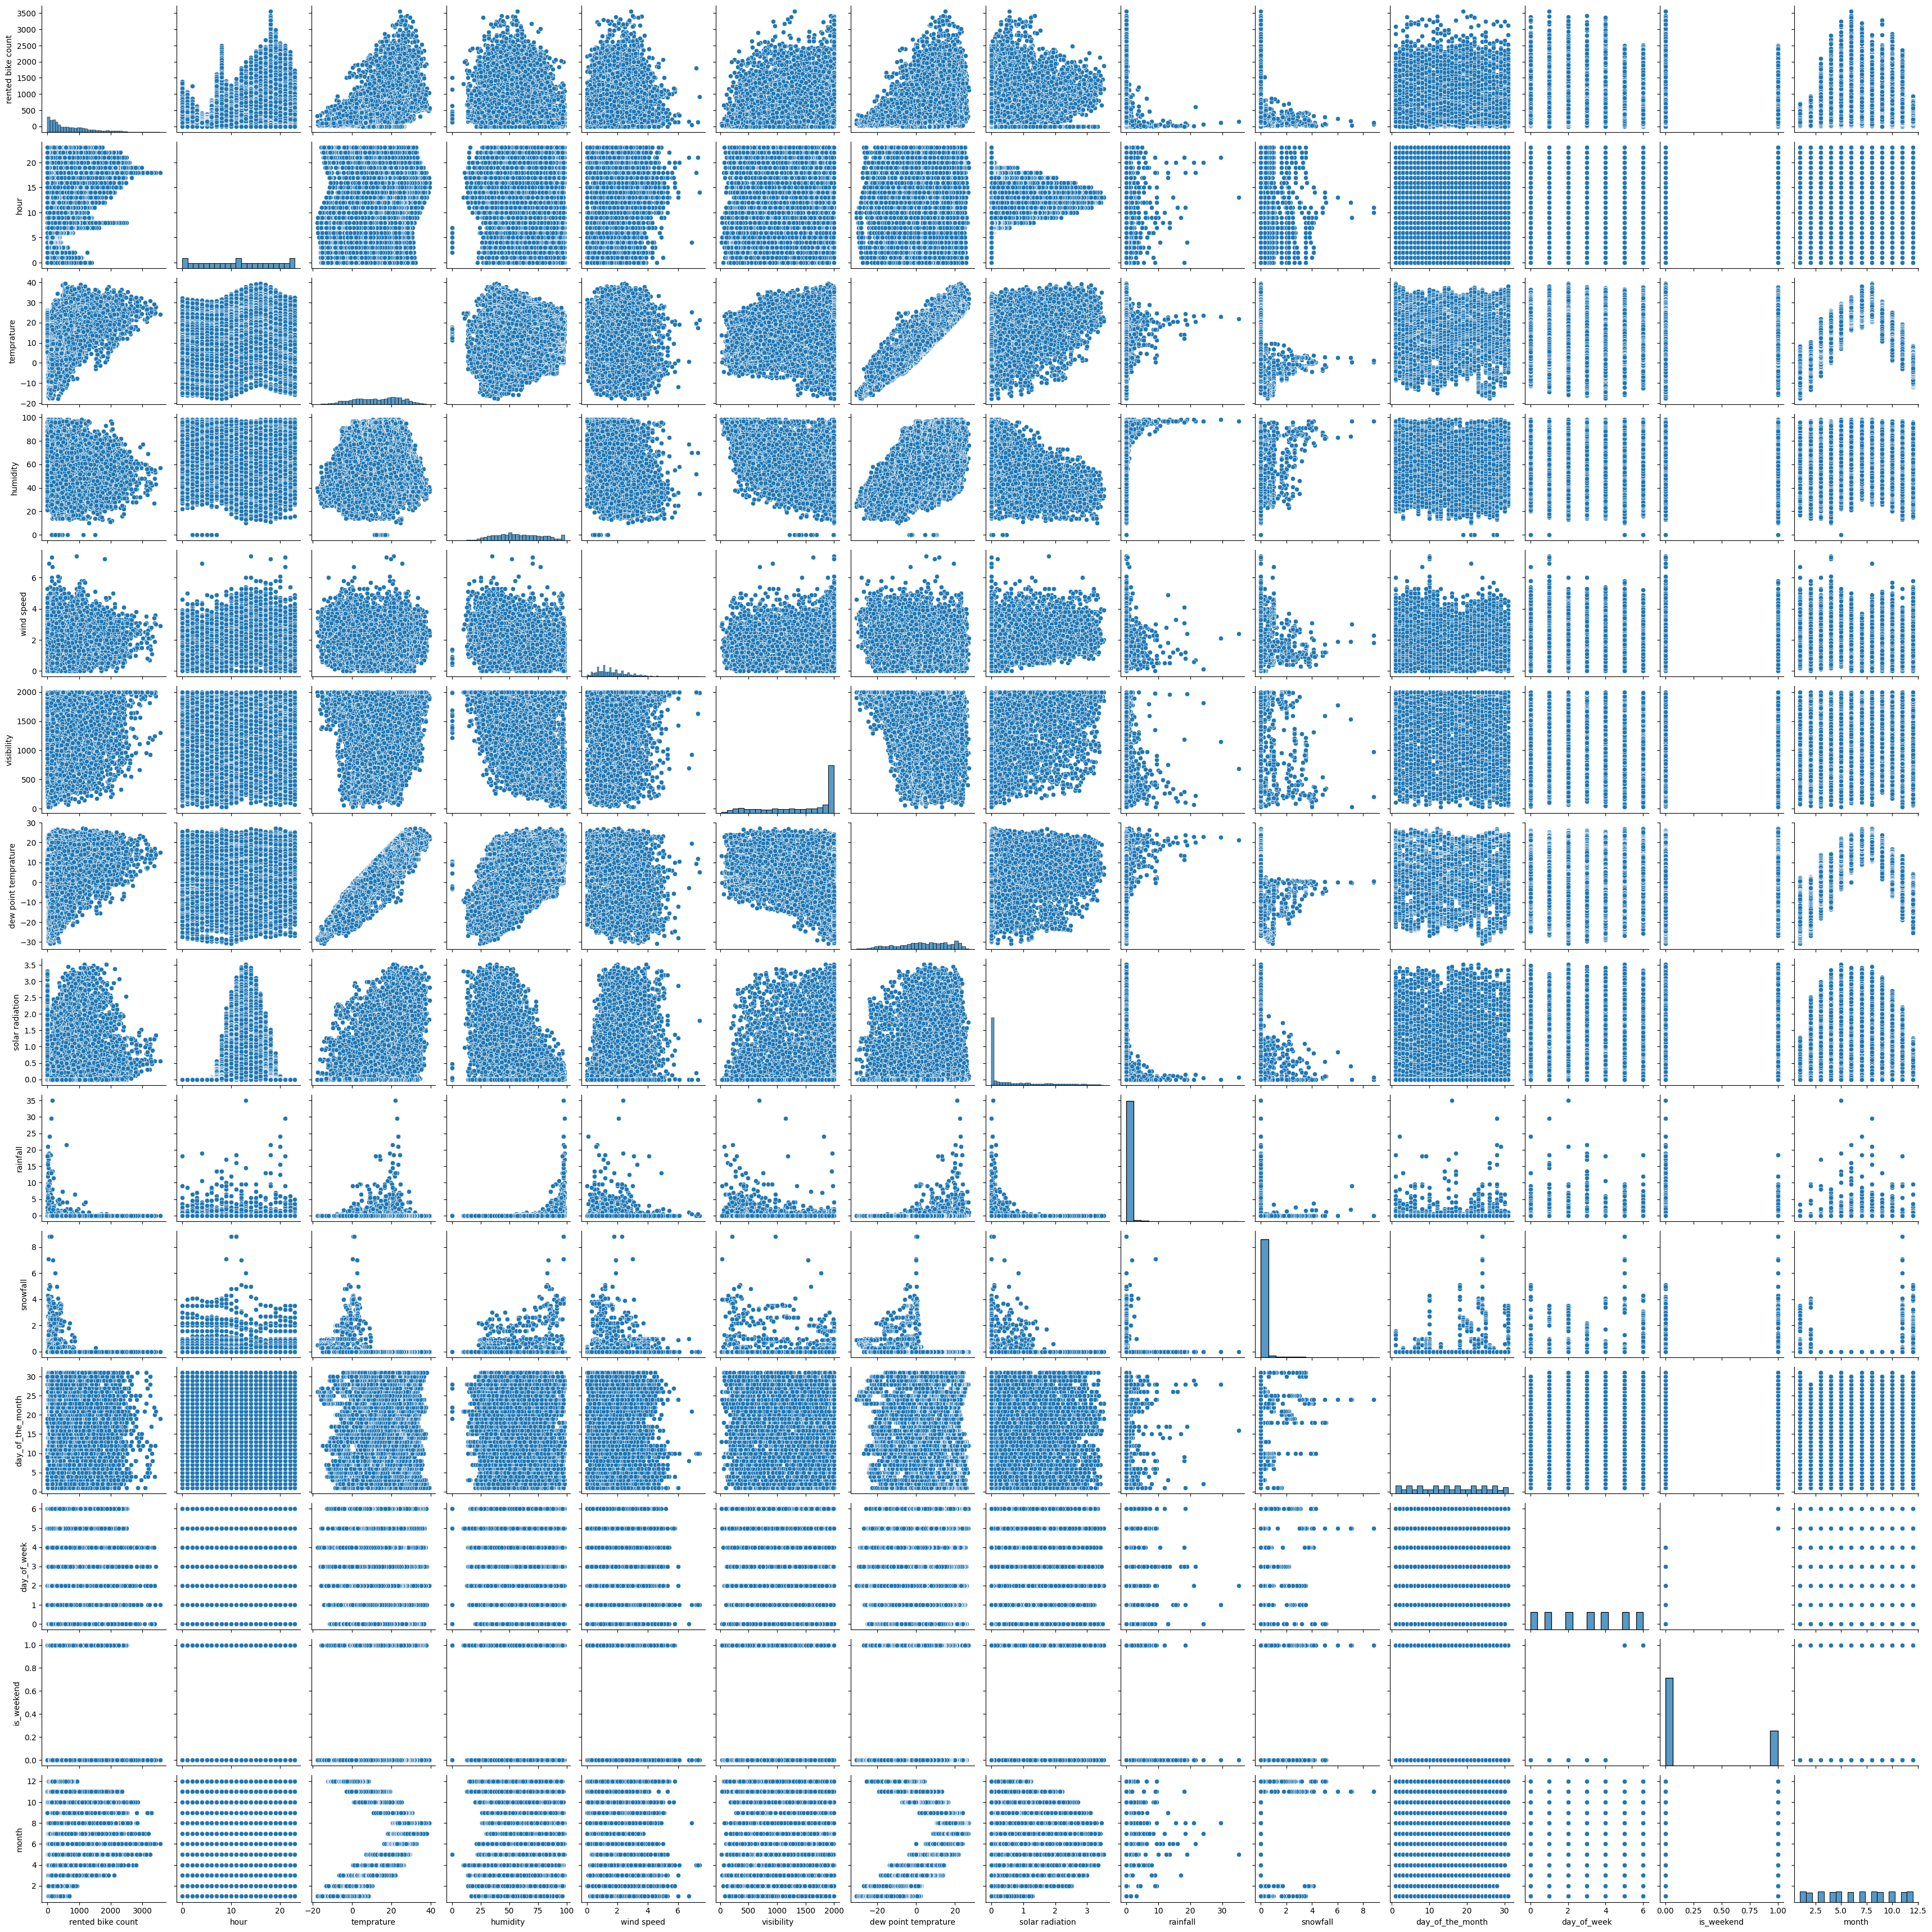

In [170]:
# Chart - 10 visualization on pair plot
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above analysis, there is no strong linear realtionship between the variables whereas there is slightly relationship between the dew point temprature with the temprature and humidity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

From the above analysis, it's evident that the dependent variable does not appear to follow a normal distribution. In response to this observation, we are making a hypothetical assumption that the data is normally distributed. As a result, we are conducting further statistical analysis to explore and assess this assumption.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

For Normality test we take the below assumptions:
- Null Hypothesis: Data is normally distributed

- Alternate Hypothesis: Data is not normally disributed


#### 2. Perform an appropriate statistical test.

In [171]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
test_data = df['rented bike count']

stats, p = shapiro(test_data)
print('stats = %.2f , p = %.3f' % (stats,p))

if p <= 0.05:
  print('Reject Null hypothesis i,e Data is not normally distributed')
else:
  print('Accept Null hypothesis i,e Data is normally distributed')

stats = 0.88 , p = 0.000
Reject Null hypothesis i,e Data is not normally distributed


##### Which statistical test have you done to obtain P-Value?

The Shapiro-Wilk test is used to obtain the p-value, which is an important parameter for accepting or rejecting the null hypothesis.

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is a statistical test used to assess whether a given dataset follows a normal distribution. It is widely used to check the normality of data, which is a common assumption in many statistical tests and models.

P-Value:

The Shapiro-Wilk test produces a p-value that quantifies the strength of evidence against the null hypothesis. A low p-value (typically below a significance level, such as 0.05) suggests that the data significantly deviates from a normal distribution, leading to the rejection of the null hypothesis. A high p-value indicates that there is no strong evidence to reject the assumption of normality.

- If the p-value is less than the chosen significance level (e.g., 0.05), you would reject the null hypothesis. This means that the data is not normally distributed.
- If the p-value is greater than the significance level, you would fail to reject the null hypothesis. This suggests that the data may be approximately normally distributed.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [172]:
# Approach to find missing values
print(df.isnull().sum())

date                    0
rented bike count       0
hour                    0
temprature              0
humidity                0
wind speed              0
visibility              0
dew point temprature    0
solar radiation         0
rainfall                0
snowfall                0
seasons                 0
holiday                 0
functioning day         0
day_of_the_month        0
day_of_week             0
is_weekend              0
month                   0
dtype: int64


In [173]:
# secong approach to find missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  8760 non-null   object 
 1   rented bike count     8760 non-null   int64  
 2   hour                  8760 non-null   int64  
 3   temprature            8760 non-null   float64
 4   humidity              8760 non-null   int64  
 5   wind speed            8760 non-null   float64
 6   visibility            8760 non-null   int64  
 7   dew point temprature  8760 non-null   float64
 8   solar radiation       8760 non-null   float64
 9   rainfall              8760 non-null   float64
 10  snowfall              8760 non-null   float64
 11  seasons               8760 non-null   object 
 12  holiday               8760 non-null   object 
 13  functioning day       8760 non-null   object 
 14  day_of_the_month      8760 non-null   int64  
 15  day_of_week          

#### What all missing value imputation techniques have you used and why did you use those techniques?

The methods mentioned above are fundamental approaches to identify missing values in a dataset for each column. As observed, our data is devoid of any missing values.

### 2. Handling Outliers

In [174]:
#creating a copy final dataset to proceed for futher analysis
df2 = df.copy()
print(df.shape)
print(df2.shape)

(8760, 18)
(8760, 18)


In [180]:
'''# Handling Outliers & Outlier treatments
# using IQR method to deal with Outliers
q1,median,q3 = df2['rented bike count'].quantile([0.25, 0.50,0.75])
iqr = q3 - q1
lower_limit = q1- (1.5 * iqr)
upper_limit = q3 + (1.5* iqr)
df2['rented bike count'] = np.where(df2['rented bike count'] > upper_limit,median, np.where(df2['rented bike count'] < lower_limit,median,df2['rented bike count']))

# Removing oultiers by using capping method
for col in df2[['wind speed', 'solar radiation','rainfall','snowfall']]:
  upper_limit = df2[col].quantile(0.99)
  df2[col] = np.where(df2[col] > upper_limit,upper_limit,df2[col])'''

In [181]:
df2.describe()

rented bike count         hour   temprature     humidity   wind speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          635.679795    11.500000    12.882922    58.226256     1.720114   
std           545.826671     6.922582    11.944825    20.362413     1.019646   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.062500    11.500000    13.700000    57.000000     1.500000   
75%           982.000000    17.250000    22.500000    74.000000     2.300000   
max          2194.000000    23.000000    39.400000    98.000000     4.700000   

        visibility  dew point temprature  solar radiation     rainfall  \
count  8760.000000           8760.000000      8760.000000  8760.000000   
mean   1436.825799              4.073813         0.567985     0.097260   
std     608.298712             13.060369         0.865253     0.512681   
min      27.000000            -30.600000         0.000000     0.000000   
25%     940.000000             -4.700000         0.000000     0.000000   
50%    1698.000000              5.100000         0.010000     0.000000   
75%    2000.000000             14.800000         0.930000     0.000000   
max    2000.000000             27.200000         3.170000     4.000000   

          snowfall  day_of_the_month  day_of_week   is_weekend        month  
count  8760.000000       8760.000000  8760.000000  8760.000000  8760.000000  
mean      0.064292         15.720548     3.002740     0.284932     6.526027  
std       0.335162          8.796749     1.998056     0.451408     3.448048  
min       0.000000          1.000000     0.000000     0.000000     1.000000  
25%       0.000000          8.000000     1.000000     0.000000     4.000000  
50%       0.000000         16.000000     3.000000     0.000000     7.000000  
75%       0.000000         23.000000     5.000000     1.000000    10.000000  
max       2.500000         31.000000     6.000000     1.000000    12.000000

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here we used the IQR outlier where we found the min, median, max, quartiles and to find out the outlier values of the data.

### 3. Categorical Encoding

In [37]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [38]:
# Expand Contraction

#### 2. Lower Casing

In [39]:
# Lower Casing

#### 3. Removing Punctuations

In [40]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [41]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [42]:
# Remove Stopwords

In [43]:
# Remove White spaces

#### 6. Rephrase Text

In [44]:
# Rephrase Text

#### 7. Tokenization

In [45]:
# Tokenization

#### 8. Text Normalization

In [46]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [47]:
# POS Taging

#### 10. Text Vectorization

In [48]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [49]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [50]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [51]:
# Transform Your data

### 6. Data Scaling

In [52]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [53]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [54]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [55]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [56]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [61]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [64]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [65]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***